# Car Sales Price Prediction

# 1. Importing the libraries

In [2]:
### Data Wrangling 

import numpy as np
import pandas as pd

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

import statsmodels.api as sm
from scipy import stats


# 2. Loading/Importing the  dataset

In [3]:
### Fetching the dataset

dataset = pd.read_csv('C:/Users/vanna/OneDrive - Royal School of Administration/Desktop/Machin learning//Car_sales.csv')

In [4]:
### Looking at the sample data in the dataset

dataset.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [5]:
### Shape of the dataset

dataset.shape

(156, 16)

The dataset consists of 16 columns and 157 rows.

# 3. Exploratory Data Analysis

# 3.1 Datatypes, Missing Data, and Summary Statistics

In [6]:
### Looking at the datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            156 non-null    object 
 1   Model                   156 non-null    object 
 2   Sales_in_thousands      156 non-null    float64
 3   four_year_resale_value  120 non-null    float64
 4   Vehicle_type            156 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    int64  
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           156 non-null    ob

transform to categories

In [7]:
### Modifying the datatypes of the columns to category

dataset.Manufacturer = dataset.Manufacturer.astype('category')
dataset.Model = dataset.Model.astype('category')
dataset.Vehicle_type = dataset.Vehicle_type.astype('category')
dataset.Latest_Launch = dataset.Latest_Launch.astype('category')

Looking at the modified datatypes of the columns in the dataset.

In [8]:
### Looking at the modified datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Manufacturer            156 non-null    category
 1   Model                   156 non-null    category
 2   Sales_in_thousands      156 non-null    float64 
 3   four_year_resale_value  120 non-null    float64 
 4   Vehicle_type            156 non-null    category
 5   Price_in_thousands      155 non-null    float64 
 6   Engine_size             156 non-null    float64 
 7   Horsepower              156 non-null    int64   
 8   Wheelbase               156 non-null    float64 
 9   Width                   156 non-null    float64 
 10  Length                  156 non-null    float64 
 11  Curb_weight             155 non-null    float64 
 12  Fuel_capacity           156 non-null    float64 
 13  Fuel_efficiency         154 non-null    float64 
 14  Latest_Launch           15

In [9]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,156.000000,120.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.994987,18.060750,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.248508,11.500614,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.035000,11.255000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.213000,14.095000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,68.069750,19.878750,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


# 3.2 Feature Analysis

# 3.2.1  Manufacturer(Category variable)

In [10]:
### Value counts of the column - Manufacturer

manufacturer_count = dataset['Manufacturer'].value_counts(dropna = False)
manufacturer_count

Manufacturer
Dodge         11
Ford          11
Mercedes-B     9
Toyota         9
Chevrolet      9
Nissan         7
Mitsubishi     7
Volvo          6
Pontiac        6
Lexus          6
Oldsmobile     6
Mercury        6
Chrysler       6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

In [11]:
### Mean sales per each Manufacturer 

mean_sales_manufacturer = dataset[['Manufacturer', 'Sales_in_thousands']].groupby('Manufacturer', as_index = False).mean()
mean_sales_manufacturer

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\763145924.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sales_manufacturer = dataset[['Manufacturer', 'Sales_in_thousands']].groupby('Manufacturer', as_index = False).mean()


,Manufacturer,Sales_in_thousands
0,Acura,19.751250
1,Audi,13.519000
2,BMW,15.501667
3,Buick,60.504750
4,Cadillac,22.435600
5,Chevrolet,61.596111
6,Chrysler,24.706833
7,Dodge,82.740818
8,Ford,183.875909
9,Honda,118.534800


# 3.2.2. Model (Categorical Variable)

In [12]:
### Value counts of the column - Model

model_count = dataset['Model'].value_counts(dropna = False)
model_count

Model
Neon             2
3-Sep            1
Outback          1
Montero Sport    1
Mountaineer      1
                ..
Diamante         1
Durango          1
E-Class          1
ES300            1
Xterra           1
Name: count, Length: 155, dtype: int64

In [13]:
### Mean sales per each Model

mean_sales_model = dataset[['Model', 'Sales_in_thousands']].groupby('Model', as_index = False).mean()
mean_sales_model

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\2403774953.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sales_model = dataset[['Model', 'Sales_in_thousands']].groupby('Model', as_index = False).mean()


,Model,Sales_in_thousands
0,3-Sep,12.115
1,3000GT,0.110
2,300M,30.696
3,323i,19.747
4,328i,9.231
...,...,...
150,Viper,0.916
151,Voyager,24.155
152,Windstar,155.787
153,Wrangler,55.557


# 3.2.3  Vehicle_type(Categorical variable)

In [14]:
### Value counts of the column - Vehicle_type

vehicle_count = dataset['Vehicle_type'].value_counts(dropna = False)
vehicle_count

Vehicle_type
Passenger    116
Car           40
Name: count, dtype: int64

# 3.2.4 Sales_in_thousands Feature

## Check all Features numerical Variable of Distribution 

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\3595506856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(dataset['Sales_in_thousands'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Sales_in_thousands')

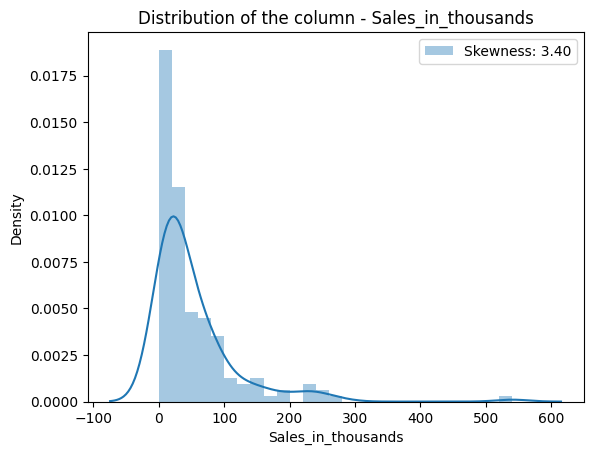

In [15]:
sns.distplot(dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(dataset['Sales_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Sales_in_thousands')

# 3.2.5 Four_year_resale_value Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\928858986.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['four_year_resale_value'], label = 'Skewness: %.2f'%(dataset['four_year_resale_value'].skew()))


Text(0.5, 1.0, 'Distribution of the column - four_year_resale_value')

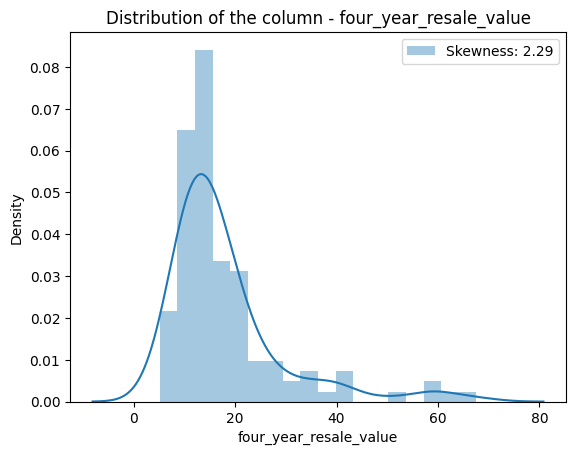

In [16]:
### Understanding the distribution of the column - __year_resale_value

sns.distplot(dataset['four_year_resale_value'], label = 'Skewness: %.2f'%(dataset['four_year_resale_value'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - four_year_resale_value')

# 3.2.6 Price_in_thousands Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\1321528395.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price_in_thousands'], label = 'Skewness: %.2f'%(dataset['Price_in_thousands'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Price_in_thousands')

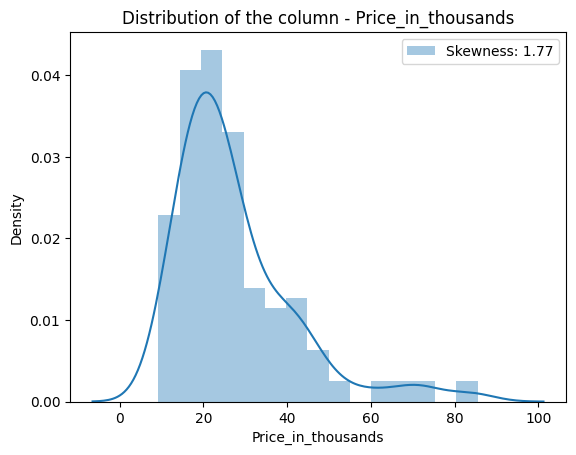

In [17]:
### Understanding the distribution of the column - Price_in_thousands

sns.distplot(dataset['Price_in_thousands'], label = 'Skewness: %.2f'%(dataset['Price_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price_in_thousands')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.7 Engine_size Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\2011741895.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Engine_size'], label = 'Skewness: %.2f'%(dataset['Engine_size'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Engine_size')

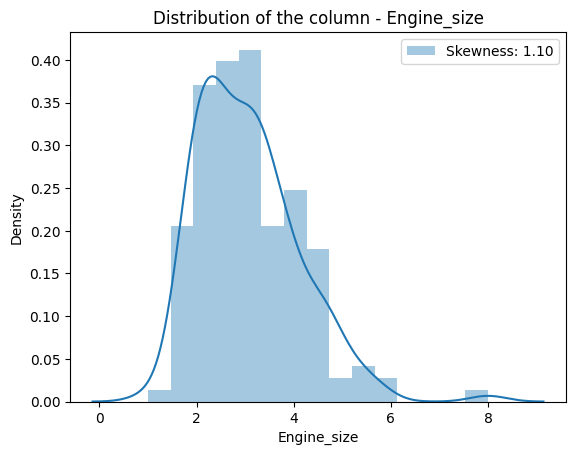

In [18]:
### Understanding the distribution of the column - Engine_size

sns.distplot(dataset['Engine_size'], label = 'Skewness: %.2f'%(dataset['Engine_size'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Engine_size')

# 3.2.8 Horsepower Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\296443291.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Horsepower'], label = 'Skewness: %.2f'%(dataset['Horsepower'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Horsepower')

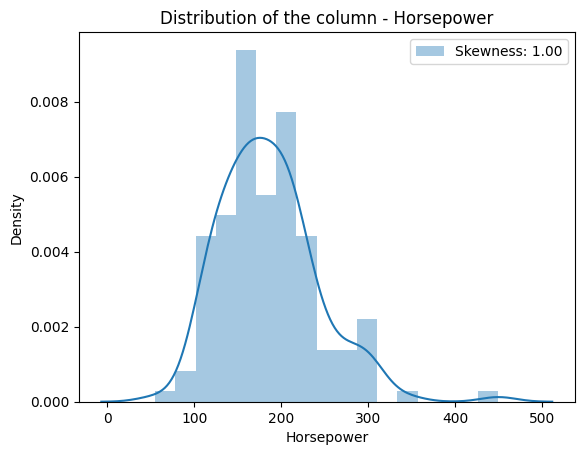

In [19]:
### Understanding the distribution of the column - Horsepower

sns.distplot(dataset['Horsepower'], label = 'Skewness: %.2f'%(dataset['Horsepower'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Horsepower')

# 3.2.9  Wheelbase Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\524748475.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Wheelbase'], label = 'Skewness: %.2f'%(dataset['Wheelbase'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Wheelbase')

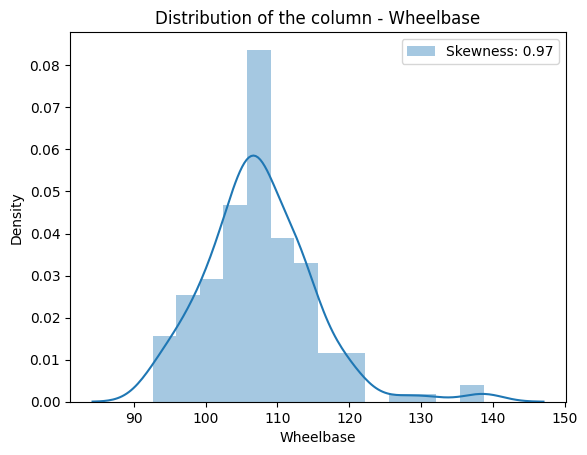

In [20]:
### Understanding the distribution of the column - Wheelbase

sns.distplot(dataset['Wheelbase'], label = 'Skewness: %.2f'%(dataset['Wheelbase'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Wheelbase')

From the above graph, we can see that the data is slightly skewed. We will remove this skewness during the Data Preprocessing phase.

# 3.2.10  Width Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\899806734.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Width'], label = 'Skewness: %.2f'%(dataset['Width'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Width')

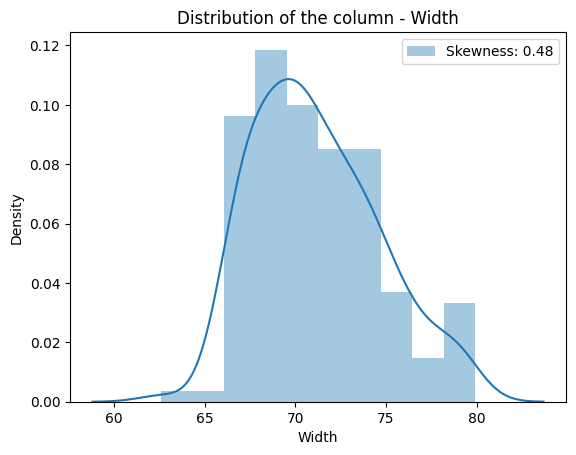

In [21]:
### Understanding the distribution of the column - Width

sns.distplot(dataset['Width'], label = 'Skewness: %.2f'%(dataset['Width'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Width')

# 3.2.11 Length Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\30548718.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Length'], label = 'Skewness: %.2f'%(dataset['Length'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Length')

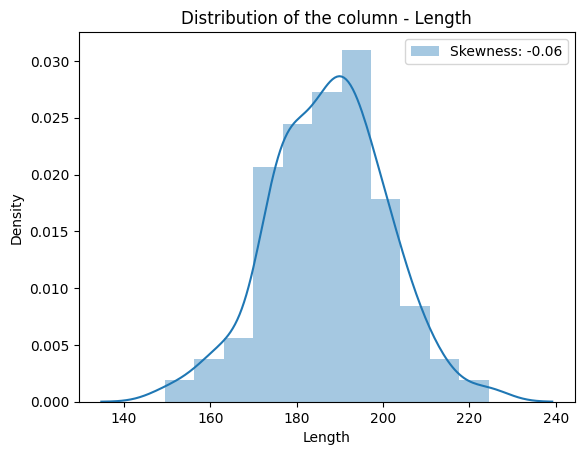

In [22]:
### Understanding the distribution of the column - Length

sns.distplot(dataset['Length'], label = 'Skewness: %.2f'%(dataset['Length'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Length')

# 3.2.12 Curb_weight Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\1633524324.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Curb_weight'], label = 'Skewness: %.2f'%(dataset['Curb_weight'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Curb_weight')

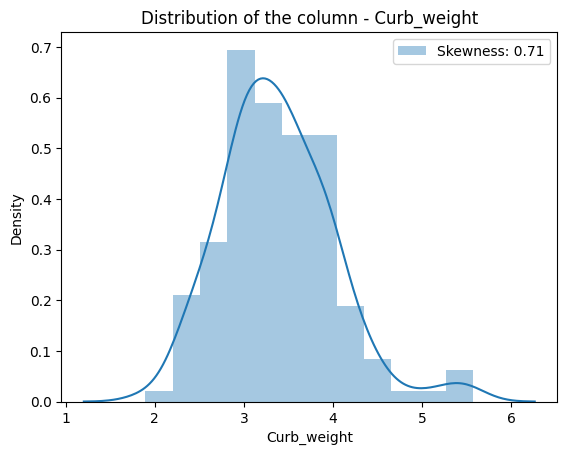

In [23]:
### Understanding the distribution of the column - Curb_weight

sns.distplot(dataset['Curb_weight'], label = 'Skewness: %.2f'%(dataset['Curb_weight'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Curb_weight')

From the above graph, we can see that the data is normally distributed.

# 3.2.13 Fuel_capacity Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\3520856720.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(dataset['Fuel_capacity'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Fuel_capacity')

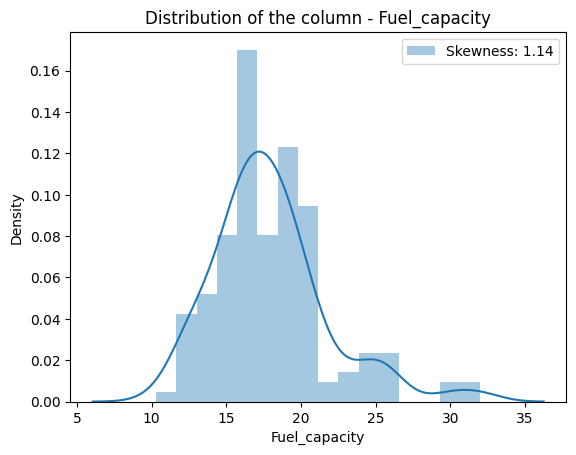

In [24]:
### Understanding the distribution of the column - Fuel_capacity

sns.distplot(dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(dataset['Fuel_capacity'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_capacity')

# 3.2.14 Fuel_efficiency Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\249285550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Fuel_efficiency'], label = 'Skewness: %.2f'%(dataset['Fuel_efficiency'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Fuel_efficiency')

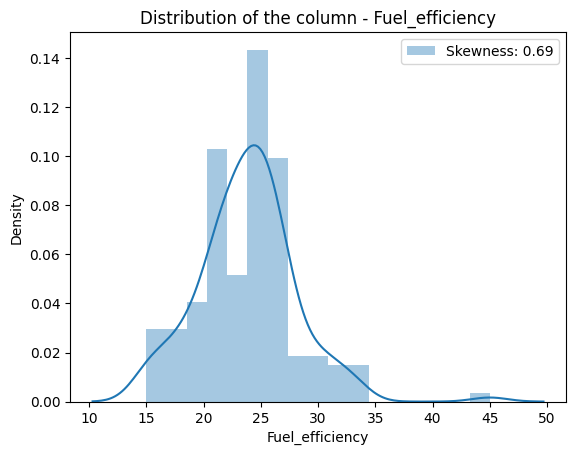

In [25]:
### Understanding the distribution of the column - Fuel_efficiency

sns.distplot(dataset['Fuel_efficiency'], label = 'Skewness: %.2f'%(dataset['Fuel_efficiency'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_efficiency')

# 3.2.15 Power_perf_factor Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\188923117.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(dataset['Power_perf_factor'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Power_perf_factor')

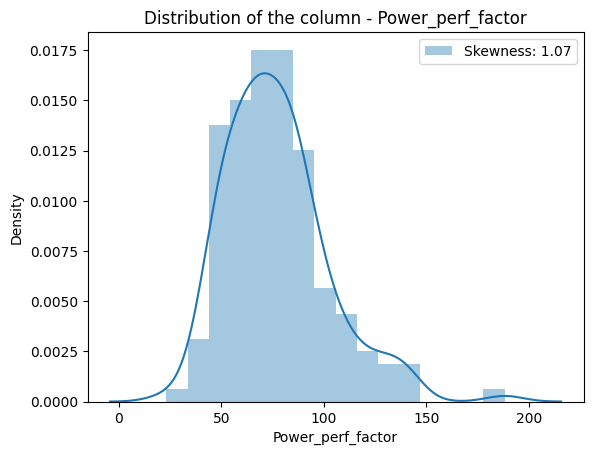

In [26]:
### Understanding the distribution of the column - Power_perf_factor

sns.distplot(dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(dataset['Power_perf_factor'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Power_perf_factor')

# 4. Data Preprocessing

# 4.1 Detect and remove outliers in numerical variables

## Check outliers before Capping 

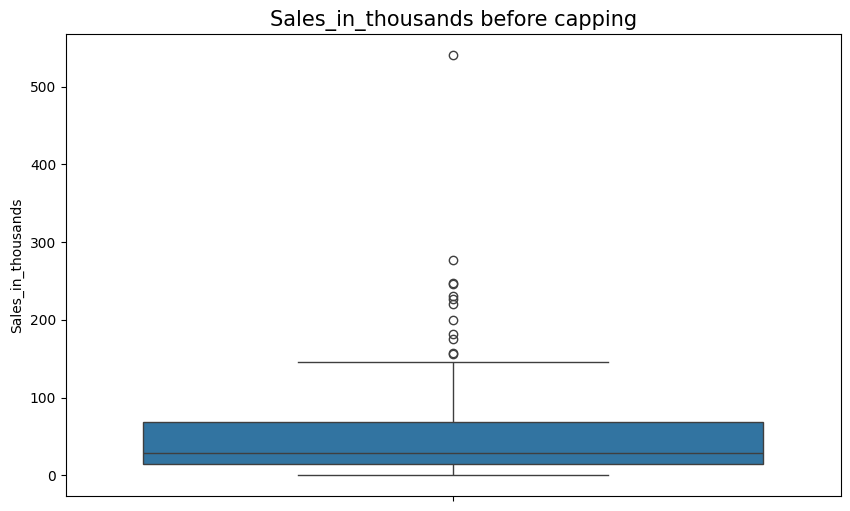

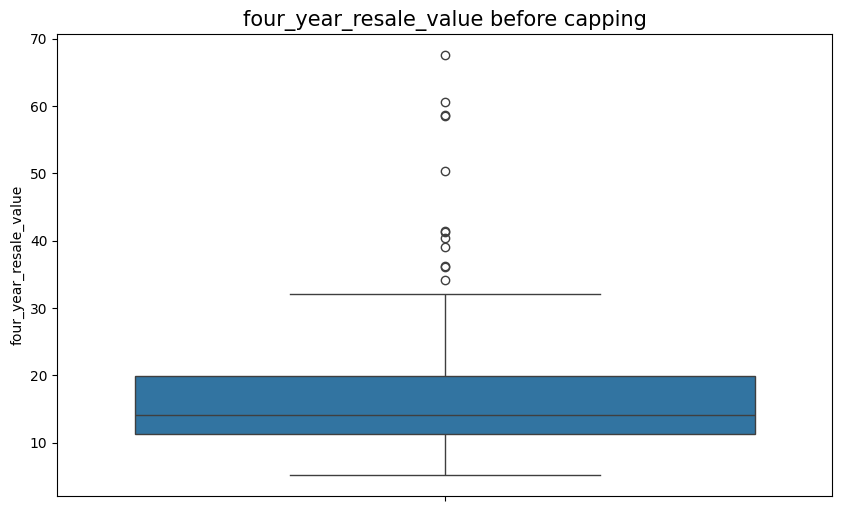

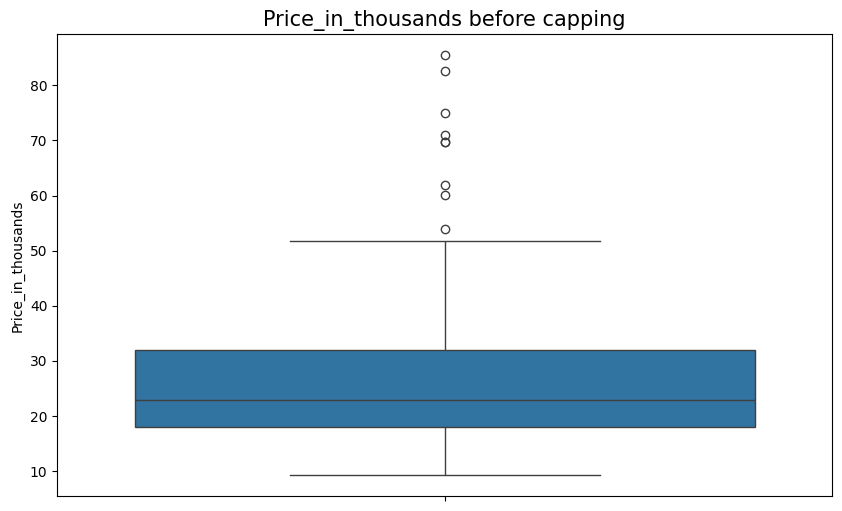

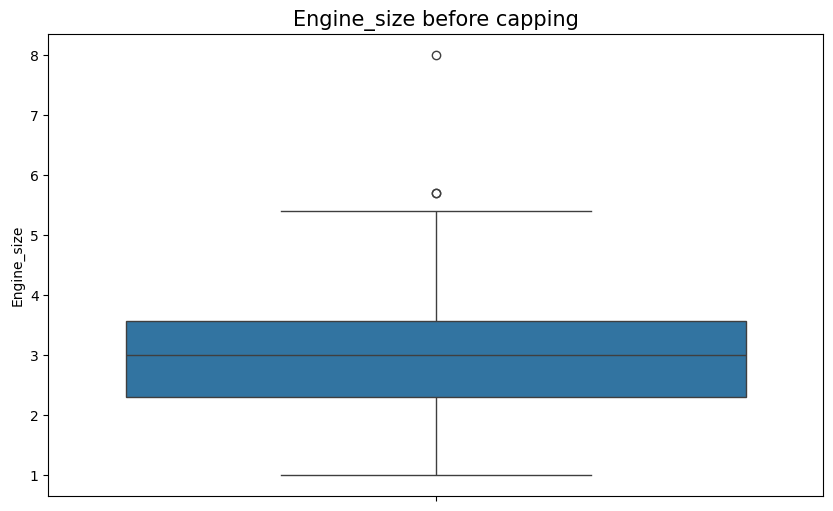

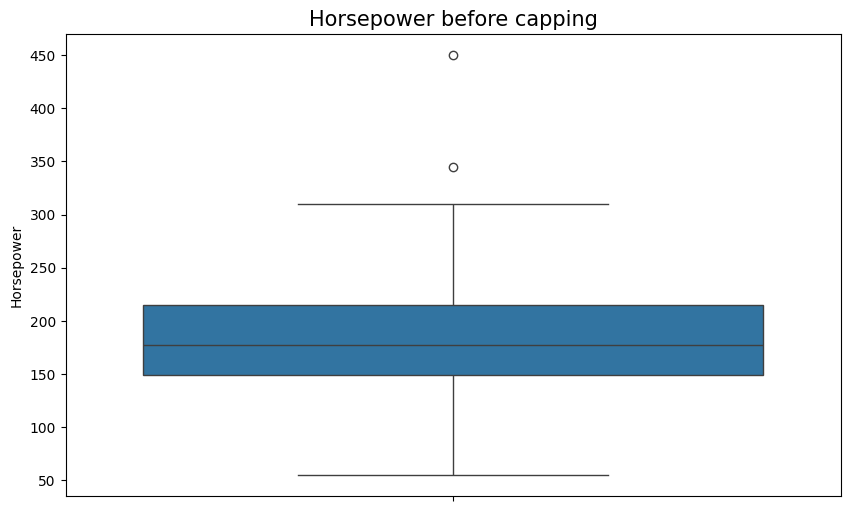

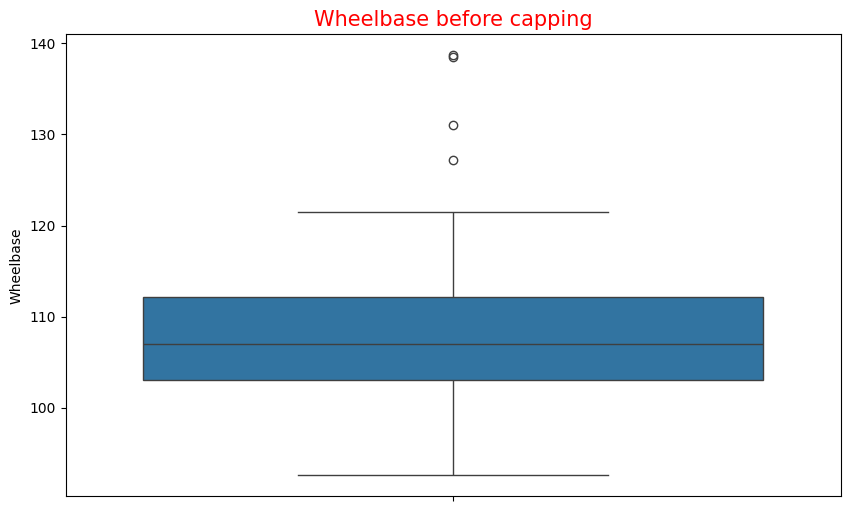

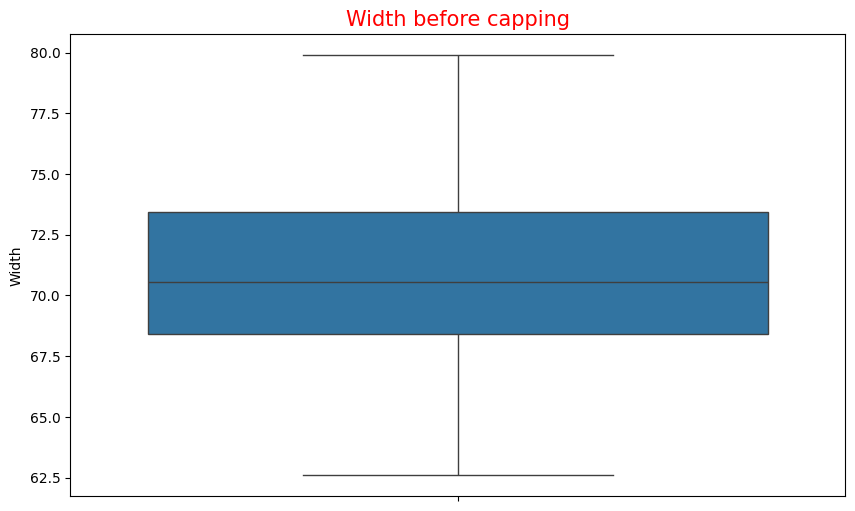

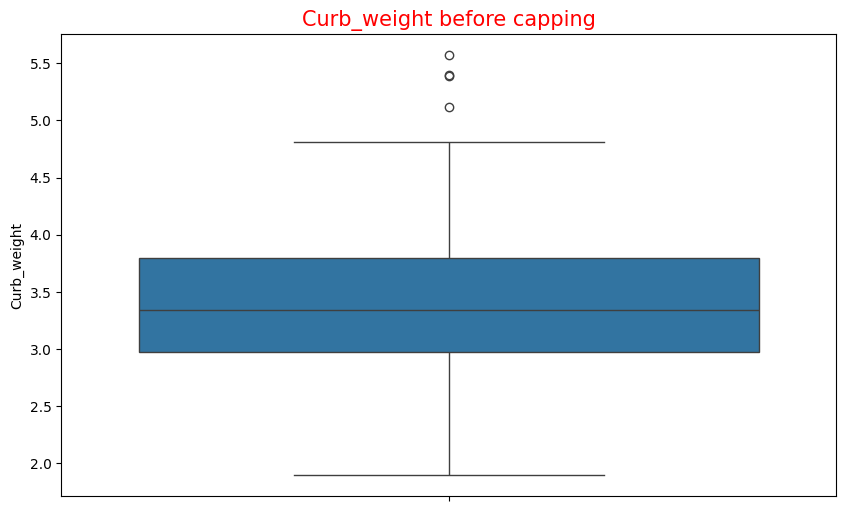

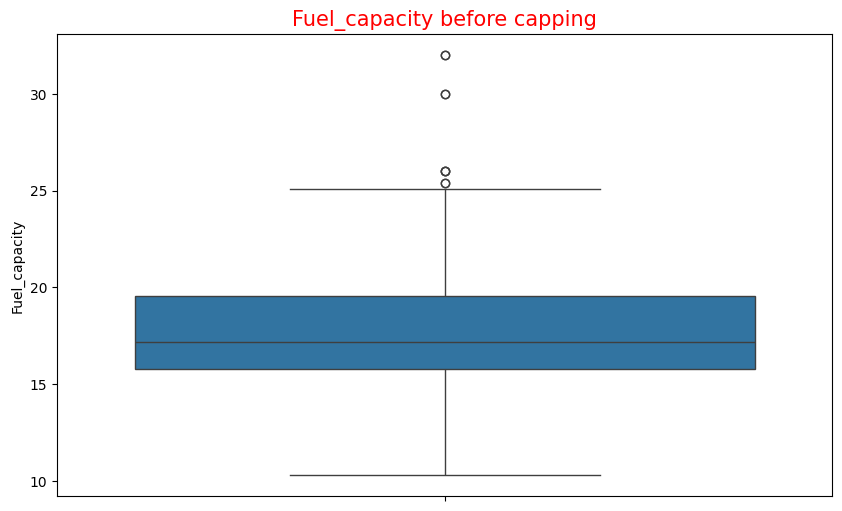

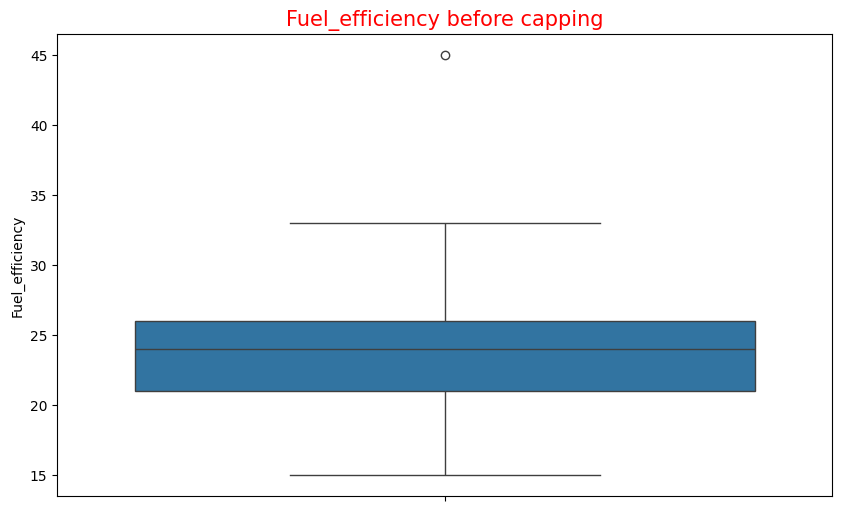

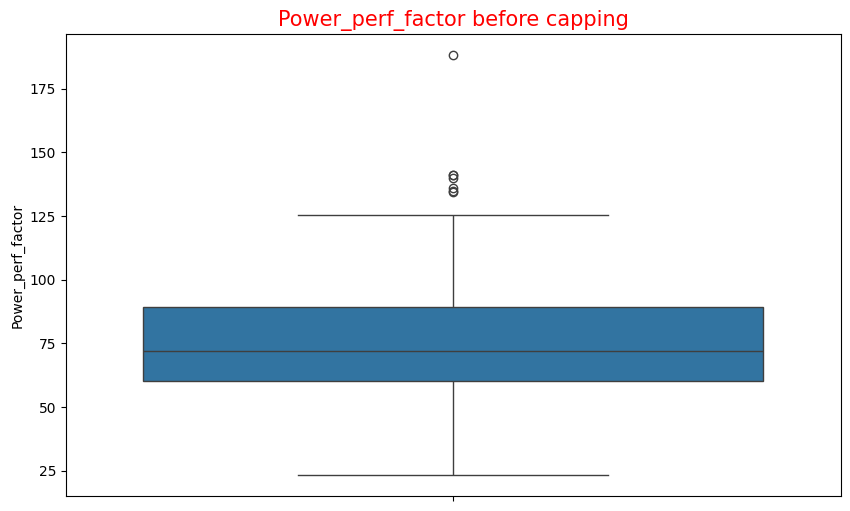

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset["Sales_in_thousands"])
plt.title("Sales_in_thousands before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["four_year_resale_value"])
plt.title("four_year_resale_value before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Price_in_thousands"])
plt.title("Price_in_thousands before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Engine_size"])
plt.title("Engine_size before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Horsepower"])
plt.title("Horsepower before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Wheelbase"])
plt.title("Wheelbase before capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Width"])
plt.title("Width before capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Curb_weight"])
plt.title("Curb_weight before capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Fuel_capacity"])
plt.title("Fuel_capacity before capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Fuel_efficiency"])
plt.title("Fuel_efficiency before capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Power_perf_factor"])
plt.title("Power_perf_factor before capping", size=15,color="r")
plt.show()



In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [29]:
lowerprice, upperprice = remove_outlier(dataset["Price_in_thousands"])
dataset["Price_in_thousands"] = np.where(dataset["Price_in_thousands"]>upperprice, upperprice, dataset["Price_in_thousands"])
dataset["Price_in_thousands"] = np.where(dataset["Price_in_thousands"]<lowerprice, lowerprice, dataset["Price_in_thousands"])

In [30]:
lowerprice, upperprice = remove_outlier(dataset["Sales_in_thousands"])
dataset["Sales_in_thousands"] = np.where(dataset["Sales_in_thousands"]>upperprice, upperprice, dataset["Sales_in_thousands"])
dataset["Sales_in_thousands"] = np.where(dataset["Sales_in_thousands"]<lowerprice, lowerprice, dataset["Sales_in_thousands"])

In [31]:
lowerprice, upperprice = remove_outlier(dataset["four_year_resale_value"])
dataset["four_year_resale_value"] = np.where(dataset["four_year_resale_value"]>upperprice, upperprice, dataset["four_year_resale_value"])
dataset["four_year_resale_value"] = np.where(dataset["four_year_resale_value"]<lowerprice, lowerprice, dataset["four_year_resale_value"])

lowerprice, upperprice = remove_outlier(dataset["Engine_size"])
dataset["Engine_size"] = np.where(dataset["Engine_size"]>upperprice, upperprice, dataset["Engine_size"])
dataset["Engine_size"] = np.where(dataset["Engine_size"]<lowerprice, lowerprice, dataset["Engine_size"])

lowerprice, upperprice = remove_outlier(dataset["Horsepower"])
dataset["Horsepower"] = np.where(dataset["Horsepower"]>upperprice, upperprice, dataset["Horsepower"])
dataset["Horsepower"] = np.where(dataset["Horsepower"]<lowerprice, lowerprice, dataset["Horsepower"])

lowerprice, upperprice = remove_outlier(dataset["Wheelbase"])
dataset["Wheelbase"] = np.where(dataset["Wheelbase"]>upperprice, upperprice, dataset["Wheelbase"])
dataset["Wheelbase"] = np.where(dataset["Wheelbase"]<lowerprice, lowerprice, dataset["Wheelbase"])

In [32]:
lowerprice, upperprice = remove_outlier(dataset["Curb_weight"])
dataset["Curb_weight"] = np.where(dataset["Curb_weight"]>upperprice, upperprice, dataset["Curb_weight"])
dataset["Curb_weight"] = np.where(dataset["Curb_weight"]<lowerprice, lowerprice, dataset["Curb_weight"])

lowerprice, upperprice = remove_outlier(dataset["Fuel_capacity"])
dataset["Fuel_capacity"] = np.where(dataset["Fuel_capacity"]>upperprice, upperprice, dataset["Fuel_capacity"])
dataset["Fuel_capacity"] = np.where(dataset["Fuel_capacity"]<lowerprice, lowerprice, dataset["Fuel_capacity"])

lowerprice, upperprice = remove_outlier(dataset["Fuel_efficiency"])
dataset["Fuel_efficiency"] = np.where(dataset["Fuel_efficiency"]>upperprice, upperprice, dataset["Fuel_efficiency"])
dataset["Fuel_efficiency"] = np.where(dataset["Fuel_efficiency"]<lowerprice, lowerprice, dataset["Fuel_efficiency"])

lowerprice, upperprice = remove_outlier(dataset["Power_perf_factor"])
dataset["Power_perf_factor"] = np.where(dataset["Power_perf_factor"]>upperprice, upperprice, dataset["Power_perf_factor"])
dataset["Power_perf_factor"] = np.where(dataset["Power_perf_factor"]<lowerprice, lowerprice, dataset["Power_perf_factor"])

lowerprice, upperprice = remove_outlier(dataset["Sales_in_thousands"])
dataset["Sales_in_thousands"] = np.where(dataset["Sales_in_thousands"]>upperprice, upperprice, dataset["Sales_in_thousands"])
dataset["Sales_in_thousands"] = np.where(dataset["Sales_in_thousands"]<lowerprice, lowerprice, dataset["Sales_in_thousands"])

## Check outliers after capping the data

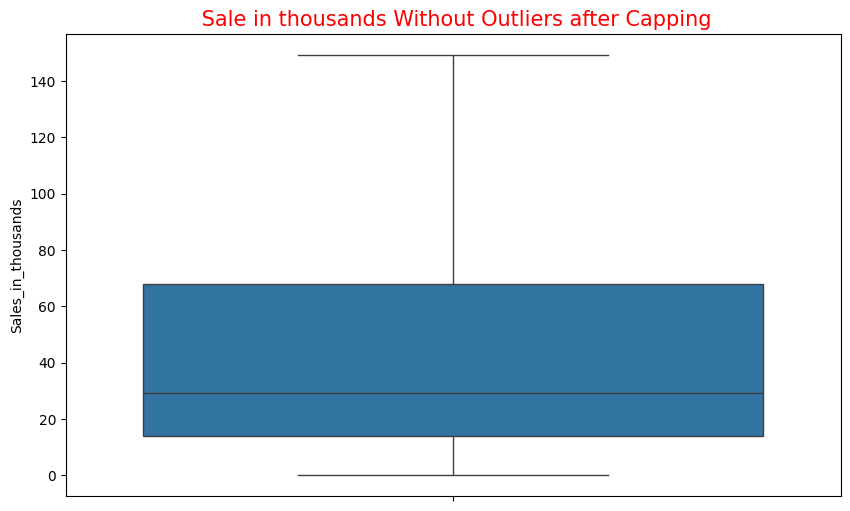

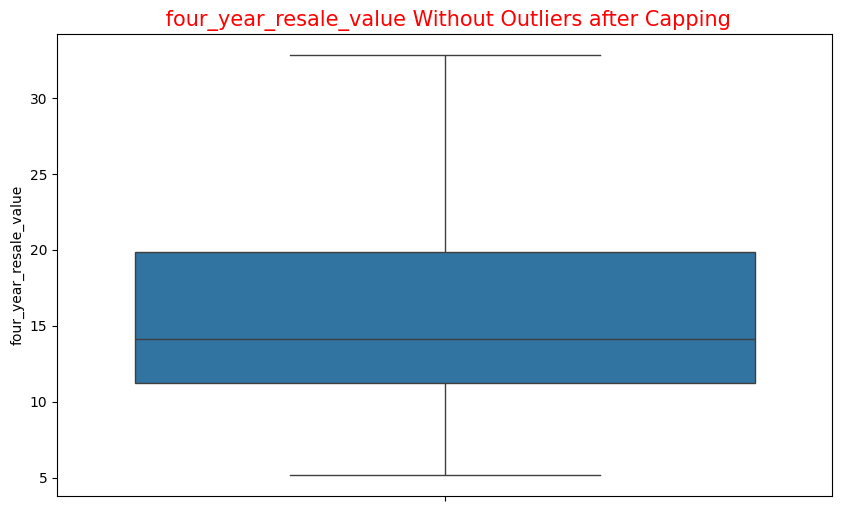

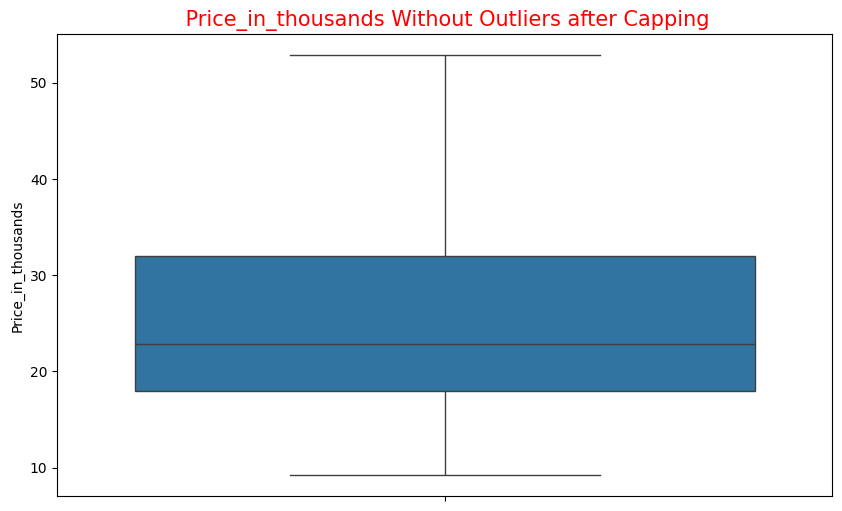

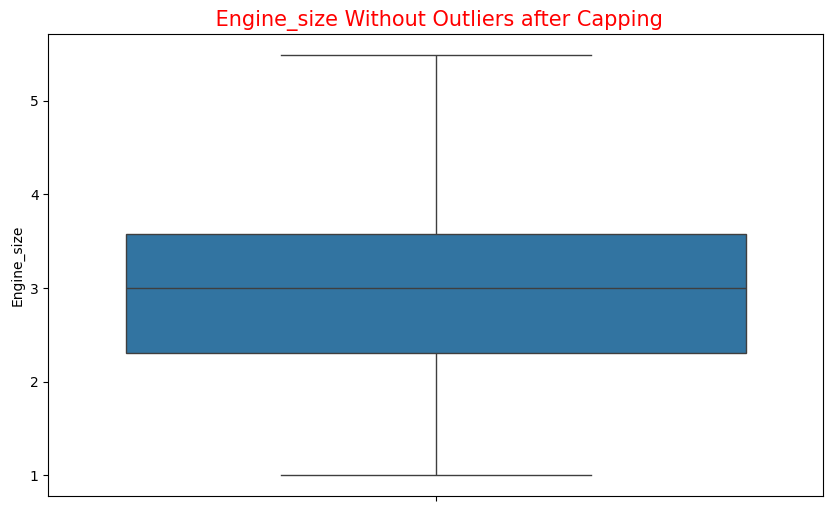

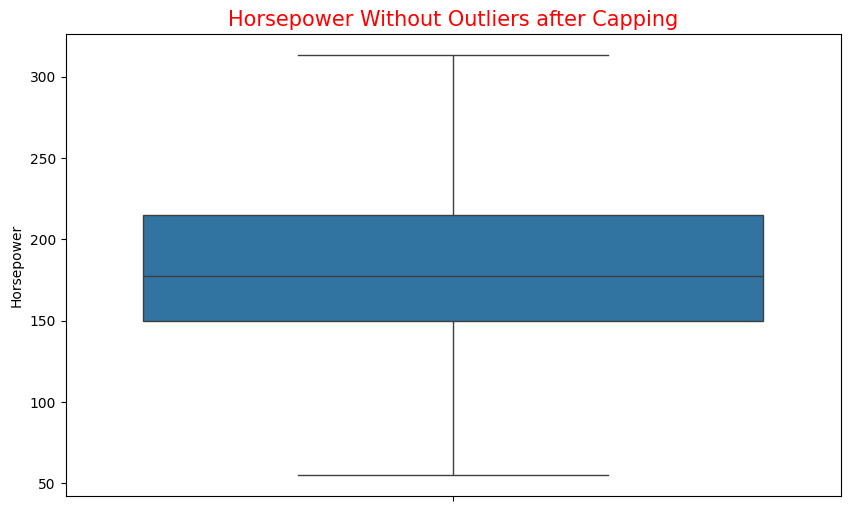

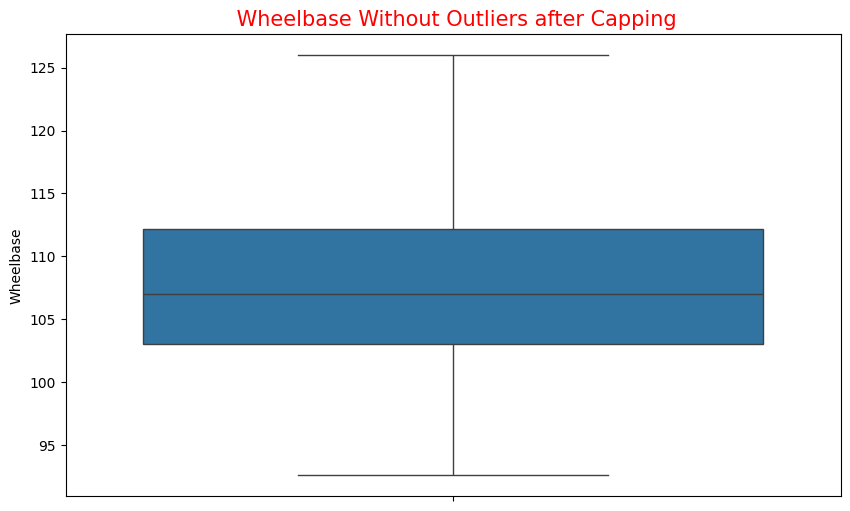

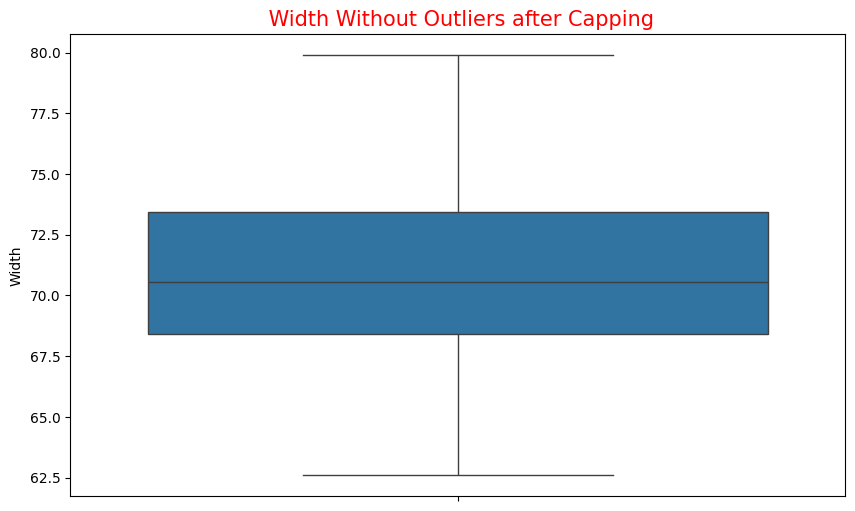

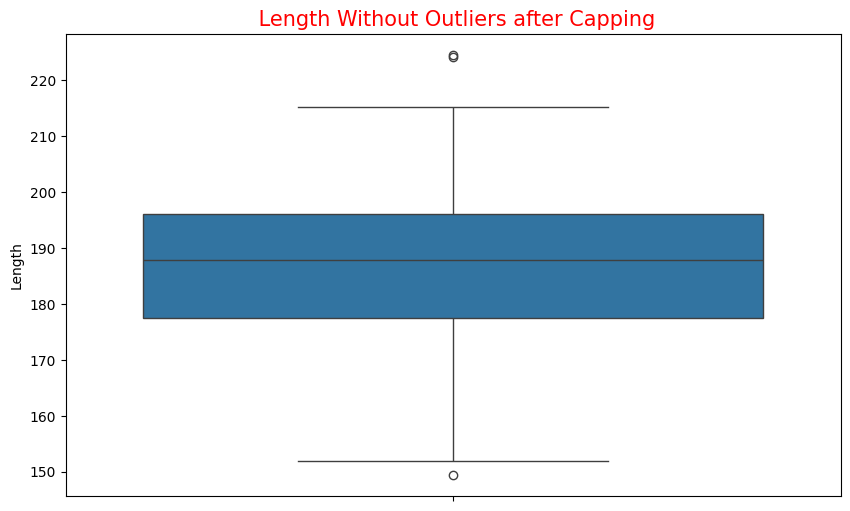

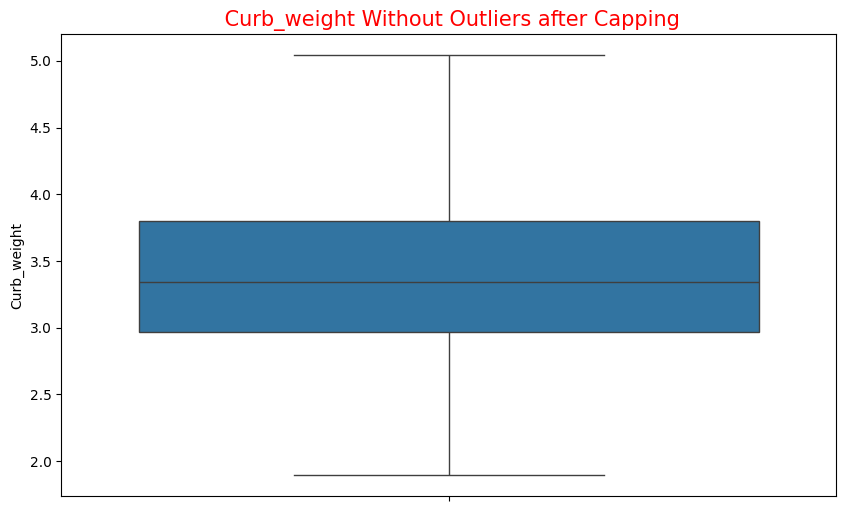

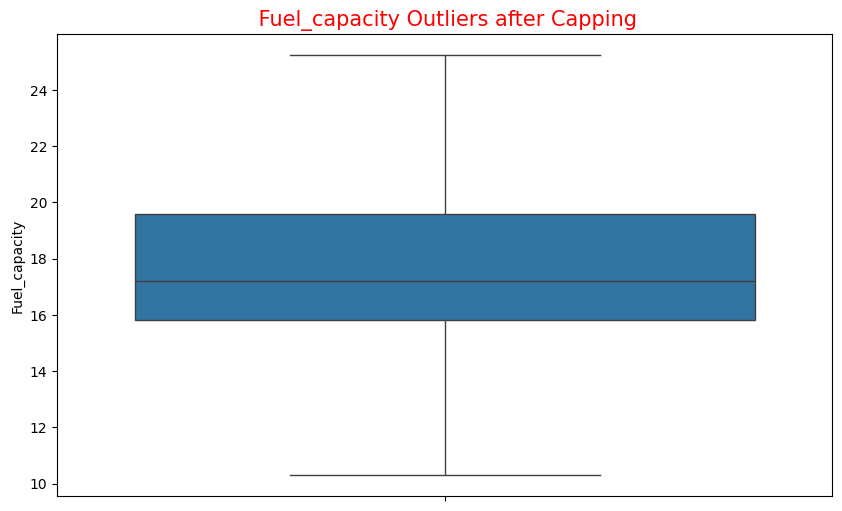

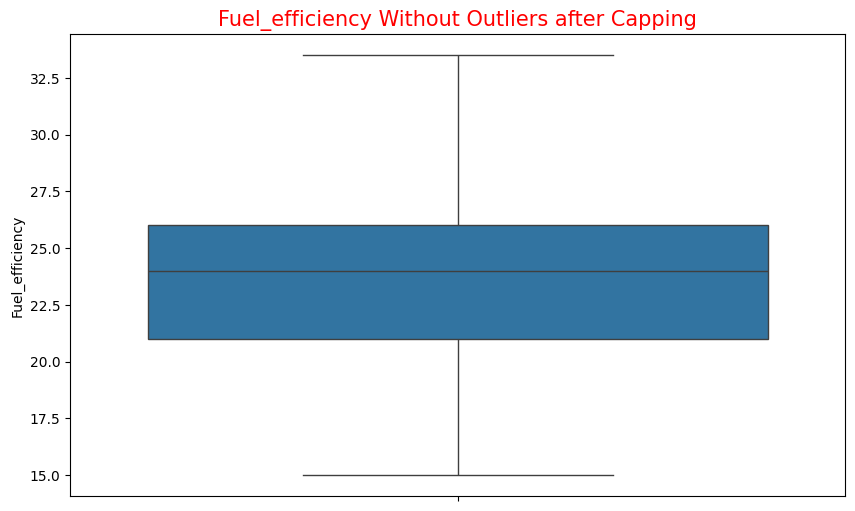

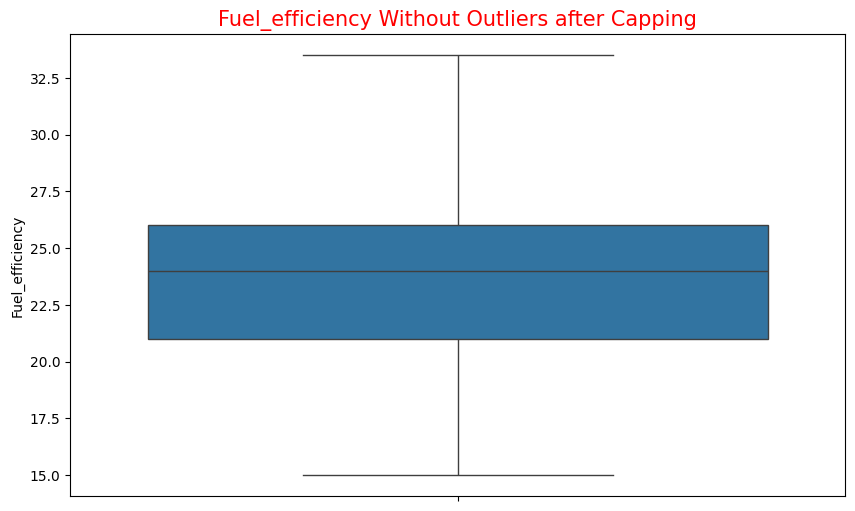

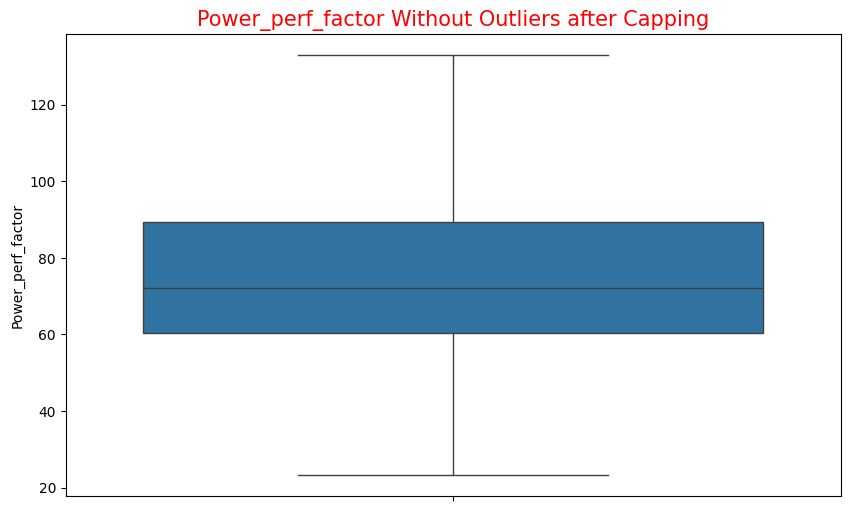

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset["Sales_in_thousands"])
plt.title(" Sale in thousands Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["four_year_resale_value"])
plt.title(" four_year_resale_value Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Price_in_thousands"])
plt.title(" Price_in_thousands Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Engine_size"])
plt.title(" Engine_size Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Horsepower"])
plt.title("Horsepower Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Wheelbase"])
plt.title(" Wheelbase Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Width"])
plt.title(" Width Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Length"])
plt.title(" Length Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Curb_weight"])
plt.title(" Curb_weight Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Fuel_capacity"])
plt.title(" Fuel_capacity Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Fuel_efficiency"])
plt.title("Fuel_efficiency Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Fuel_efficiency"])
plt.title("Fuel_efficiency Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Power_perf_factor"])
plt.title("Power_perf_factor Without Outliers after Capping", size=15,color="r")
plt.show()

# 4.2 Filling missing values

In [34]:
### Filtering the rows that has a value in the column - Sales_in_thousands

modified_dataset = dataset[dataset['Sales_in_thousands'].notna()]
modified_dataset

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
152,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
153,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
154,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [35]:
### Looking at the missing values in the dataset

modified_dataset.isnull().sum().sort_values(ascending = False)

four_year_resale_value    36
Fuel_efficiency            2
Price_in_thousands         1
Curb_weight                1
Power_perf_factor          1
Manufacturer               0
Model                      0
Sales_in_thousands         0
Vehicle_type               0
Engine_size                0
Horsepower                 0
Wheelbase                  0
Width                      0
Length                     0
Fuel_capacity              0
Latest_Launch              0
dtype: int64

# 4.2.1 Replace missing values - four_year_resale_value

In [36]:
### Replacing the missing values in the column - __year_resale_value using median

year_index = list(~modified_dataset['four_year_resale_value'].isnull())
median_year = np.median(modified_dataset['four_year_resale_value'].loc[year_index])
median_year

14.094999999999999

In [37]:
### Replacing the missing values of the column - __year_resale_value in the dataset

modified_dataset['four_year_resale_value'].fillna(median_year, inplace = True)

In [38]:
### Checking if there are any missing values of __year_resale_value in the dataset

modified_dataset['four_year_resale_value'].isnull().sum()

0

# 4.2.2 Replace missing values - Fuel_efficiency

In [39]:
### Replacing the missing values in the column - Fuel_efficiency using median

fuel_index = list(~modified_dataset['Fuel_efficiency'].isnull())
median_fuel = np.median(modified_dataset['Fuel_efficiency'].loc[fuel_index])
median_fuel

24.0

In [40]:
### Replacing the missing values of the column - Fuel_efficiency in the dataset

modified_dataset['Fuel_efficiency'].fillna(median_year, inplace = True)

In [41]:
### Checking if there are any missing values of Fuel_efficiency in the dataset

modified_dataset['Fuel_efficiency'].isnull().sum()

0

# 4.2.3 Replace missing values - Curb_weight

In [42]:
### Replacing the missing values in the column - Curb_weight using median

curb_index = list(~modified_dataset['Curb_weight'].isnull())
median_curb = np.median(modified_dataset['Curb_weight'].loc[curb_index])
median_curb

3.342

In [43]:
### Replacing the missing values of the column - Curb_weight in the dataset

modified_dataset['Curb_weight'].fillna(median_curb, inplace = True)

In [44]:
### Checking if there are any missing values of Curb_weight in the dataset

modified_dataset['Curb_weight'].isnull().sum()

0

# 4.2.4 Replace missing values - Power_Performance_factor

In [45]:
### Replacing the missing values in the column - Curb_weight using median

curb_index = list(~modified_dataset['Power_perf_factor'].isnull())
median_curb = np.median(modified_dataset['Power_perf_factor'].loc[curb_index])
median_curb

72.03091719

In [46]:
### Replacing the missing values of the column - Curb_weight in the dataset

modified_dataset['Power_perf_factor'].fillna(median_curb, inplace = True)

In [47]:
### Checking if there are any missing values of Curb_weight in the dataset

modified_dataset['Power_perf_factor'].isnull().sum()

0

# 4.2.5 Replace missing values - Price_in_thousand

In [48]:
### Replacing the missing values in the column - Curb_weight using median

curb_index = list(~modified_dataset['Price_in_thousands'].isnull())
median_curb = np.median(modified_dataset['Price_in_thousands'].loc[curb_index])
median_curb

22.799

In [49]:
### Replacing the missing values of the column - Curb_weight in the dataset

modified_dataset['Price_in_thousands'].fillna(median_curb, inplace = True)

In [50]:
### Checking if there are any missing values of Curb_weight in the dataset

modified_dataset['Price_in_thousands'].isnull().sum()

0

In [51]:
### Looking at the missing values in the dataset

modified_dataset.isnull().sum().sort_values(ascending = False)

Manufacturer              0
Model                     0
Sales_in_thousands        0
four_year_resale_value    0
Vehicle_type              0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Latest_Launch             0
Power_perf_factor         0
dtype: int64

## Find Duplicate of data

In [52]:
def find_duplicates(nums):
    duplicates = []
    seen = set()

    for num in nums:
        if num in seen:
            duplicates.append(num)
        else:
            seen.add(num)

    return duplicates

In [53]:
numbers = []
duplicates = find_duplicates(numbers)
print(duplicates)

[]


# 4.3 Feature Engineering

# 4.3.1 New Manufacturer - using the column Manufacturer

In [54]:
###before seperate to two class by mean

modified_dataset.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360000,Passenger,21.5000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875000,Passenger,28.4000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225000,Passenger,22.7990,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917
3,Acura,RL,8.588,29.725000,Passenger,42.0000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255000,Passenger,23.9900,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555000,Passenger,33.9500,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,32.814375,Passenger,52.8425,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,132.925634
7,BMW,323i,19.747,14.095000,Passenger,26.9900,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675000,Passenger,33.4000,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,32.814375,Passenger,38.9000,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [55]:
### Seperating the Manufacturers into class 1 and 2

class_1 = []
class_2 = []

for index in range(len(mean_sales_manufacturer)):
    if mean_sales_manufacturer.iloc[index, 1] <= 53:
        class_1.append(mean_sales_manufacturer.iloc[index, 0])
    else:
        class_2.append(mean_sales_manufacturer.iloc[index, 0])
        
print('Manufacturers with less than 53 mean sale: ', class_1)
print('Manufacturers with more than 53 mean sale: ', class_2)

Manufacturers with less than 53 mean sale:  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Chrysler', 'Hyundai', 'Infiniti', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Mercury', 'Mitsubishi', 'Oldsmobile', 'Plymouth', 'Porsche', 'Saab', 'Saturn', 'Subaru', 'Volkswagen', 'Volvo']
Manufacturers with more than 53 mean sale:  ['Buick', 'Chevrolet', 'Dodge', 'Ford', 'Honda', 'Jeep', 'Nissan', 'Pontiac', 'Toyota']


In [56]:
### Modifying the Manufacturer column in the dataset

manufacturer_data = modified_dataset['Manufacturer']
new_manufacturer_data = []

for value in manufacturer_data:
    if value in class_1:
        new_manufacturer_data.append(1)
    else:
        new_manufacturer_data.append(2)
        
modified_dataset['Manufacturer'] = new_manufacturer_data

In [57]:
### Looking at the modified dataset after seperating to class

modified_dataset.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,1,Integra,16.919,16.360000,Passenger,21.5000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,1,TL,39.384,19.875000,Passenger,28.4000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,1,CL,14.114,18.225000,Passenger,22.7990,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917
3,1,RL,8.588,29.725000,Passenger,42.0000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,1,A4,20.397,22.255000,Passenger,23.9900,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,1,A6,18.780,23.555000,Passenger,33.9500,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,1,A8,1.380,32.814375,Passenger,52.8425,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,132.925634
7,1,323i,19.747,14.095000,Passenger,26.9900,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,1,328i,9.231,28.675000,Passenger,33.4000,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,1,528i,17.527,32.814375,Passenger,38.9000,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


# 4.3.2 New_Model - using the column Model

Here, we will create the Model column such that if the mean Sales of a Model is less than 53 then it belongs to class 1, else class 2.

In [58]:
### Feature Model before seperat 

modified_dataset.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,1,Integra,16.919,16.360000,Passenger,21.5000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,1,TL,39.384,19.875000,Passenger,28.4000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,1,CL,14.114,18.225000,Passenger,22.7990,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917
3,1,RL,8.588,29.725000,Passenger,42.0000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,1,A4,20.397,22.255000,Passenger,23.9900,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,1,A6,18.780,23.555000,Passenger,33.9500,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,1,A8,1.380,32.814375,Passenger,52.8425,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,132.925634
7,1,323i,19.747,14.095000,Passenger,26.9900,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,1,328i,9.231,28.675000,Passenger,33.4000,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,1,528i,17.527,32.814375,Passenger,38.9000,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [59]:
### Seperating the Model into class 1 and 2

class_1 = []
class_2 = []

for index in range(len(mean_sales_model)):
    if mean_sales_model.iloc[index, 1] <= 53:
        class_1.append(mean_sales_model.iloc[index, 0])
    else:
        class_2.append(mean_sales_model.iloc[index, 0])
        
print('Model with less than 53 mean sale: ', class_1)
print('Model with more than 53 mean sale: ', class_2)

Model with less than 53 mean sale:  ['3-Sep', '3000GT', '300M', '323i', '328i', '5-Sep', '528i', 'A4', 'A6', 'A8', 'Accent', 'Aurora', 'Avenger', 'Beetle', 'Bonneville', 'Boxter', 'Bravada', 'Breeze', 'C-Class', 'C70', 'CL', 'CL500', 'CLK Coupe', 'Cabrio', 'Camaro', 'Carrera Cabrio', 'Carrera Coupe', 'Catera', 'Celica', 'Cirrus', 'Concorde', 'Continental', 'Contour', 'Corvette', 'Cougar', 'Cutlass', 'Diamante', 'E-Class', 'ES300', 'Eclipse', 'Eldorado', 'Escalade', 'Firebird', 'Forester', 'GS300', 'GS400', 'GTI', 'Golf', 'I30', 'Integra', 'Intrigue', 'LHS', 'LS', 'LS400', 'LW', 'LX470', 'Land Cruiser', 'Lumina', 'M-Class', 'Metro', 'Mirage', 'Montana', 'Monte Carlo', 'Montero', 'Montero Sport', 'Mountaineer', 'Mystique', 'Navigator', 'Outback', 'Park Avenue', 'Passat', 'Passport', 'Pathfinder', 'Prizm', 'Prowler', 'Quest', 'RAV4', 'RL', 'RX300', 'Ram Van', 'Ram Wagon', 'Regal', 'S-Class', 'S-Type', 'S40', 'S70', 'S80', 'SC', 'SL-Class', 'SLK', 'SLK230', 'SW', 'Sebring Conv.', 'Sebring 

In [60]:
### Modifying the Model column in the dataset

model_data = modified_dataset['Model']
new_model_data = []

for value in model_data:
    if value in class_1:
        new_model_data.append(1)
    else:
        new_model_data.append(2)
        
modified_dataset['Model'] = new_model_data

In [61]:
### Looking at the modified data after seperat

modified_dataset.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,1,1,16.919,16.360000,Passenger,21.5000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,1,1,39.384,19.875000,Passenger,28.4000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,1,1,14.114,18.225000,Passenger,22.7990,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917
3,1,1,8.588,29.725000,Passenger,42.0000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,1,1,20.397,22.255000,Passenger,23.9900,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,1,1,18.780,23.555000,Passenger,33.9500,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,1,1,1.380,32.814375,Passenger,52.8425,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,132.925634
7,1,1,19.747,14.095000,Passenger,26.9900,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,1,1,9.231,28.675000,Passenger,33.4000,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,1,1,17.527,32.814375,Passenger,38.9000,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [62]:
### Looking at the modified dataset

modified_dataset.tail(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
146,1,1,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
147,1,1,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372
148,1,1,5.596,13.760,Passenger,17.50,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
149,1,1,49.463,14.095,Passenger,15.90,2.0,115.0,98.9,67.9,161.1,2.769,14.5,26.0,10/20/2011,47.329632
150,1,1,16.957,14.095,Passenger,23.40,1.9,160.0,100.5,67.6,176.6,2.998,15.8,25.0,2/18/2011,66.113057
151,1,1,3.545,14.095,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
152,1,1,15.245,14.095,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
153,1,1,17.531,14.095,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
154,1,1,3.493,14.095,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
155,1,1,18.969,14.095,Passenger,36.00,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


# 4.3.3 Age - using the column Latest_Launch

In [63]:
### Creating the Age data

age_data = []
launch_data = modified_dataset['Latest_Launch']

for value in launch_data:
    year = int(value.split('/')[-1])
    age_data.append(2023 - year)

In [64]:
### Adding the Age column

modified_dataset['Age'] = age_data
modified_dataset

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Age
0,1,1,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,11
1,1,1,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,12
2,1,1,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917,11
3,1,1,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,12
4,1,1,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,1,3.545,14.095,Passenger,24.400,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,12
152,1,1,15.245,14.095,Passenger,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,11
153,1,1,17.531,14.095,Passenger,28.800,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,12
154,1,1,3.493,14.095,Passenger,45.500,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,12


In [65]:
### Dropping the column - Latest_Launch

modified_dataset.drop(['Latest_Launch'], axis = 1, inplace = True)

In [66]:
### Looking at the modified dataset

modified_dataset

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,1,1,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,11
1,1,1,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,12
2,1,1,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917,11
3,1,1,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,12
4,1,1,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,1,3.545,14.095,Passenger,24.400,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,12
152,1,1,15.245,14.095,Passenger,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,11
153,1,1,17.531,14.095,Passenger,28.800,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,12
154,1,1,3.493,14.095,Passenger,45.500,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,12


# 4.4 Data Transformation

# 4.4.1 Transforming from skew to approximately normal distribution -Sales_in_thousands

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\1507158371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(modified_dataset['Sales_in_thousands'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Sales_in_thousands')

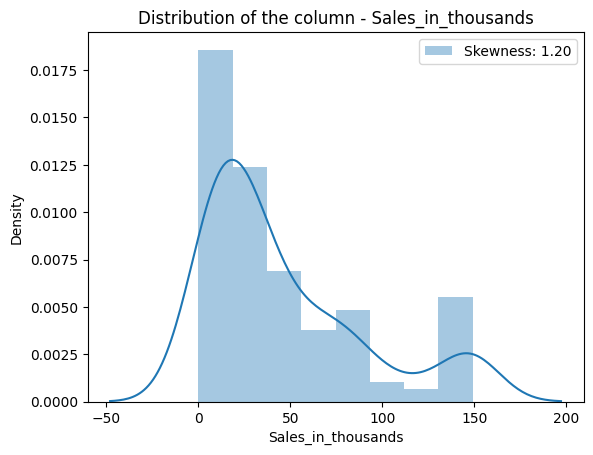

In [67]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(modified_dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(modified_dataset['Sales_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Sales_in_thousands')

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\860292759.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(modified_dataset['Sales_in_thousands'].skew()))


Text(0.5, 1.0, 'Distribution after transform -Sales_in_thousands')

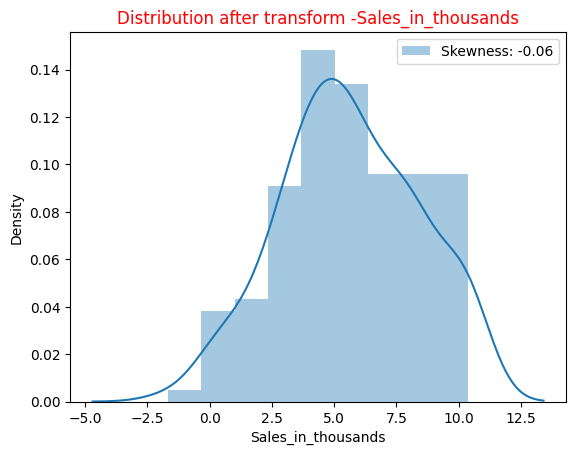

In [68]:
### Understanding the distribution of the data approximately normal distribution Sales_in_thousands
sales_data = [1 if value == 0 else value for value in modified_dataset['Sales_in_thousands']]

modified_sales, _ = stats.boxcox(sales_data)
modified_dataset['Sales_in_thousands'] = modified_sales

sns.distplot(modified_dataset['Sales_in_thousands'], label = 'Skewness: %.2f'%(modified_dataset['Sales_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution after transform -Sales_in_thousands', color='r')

# 4.4.2 Transforming from skew to approximately normal distribution -Price_in_thousands

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\284955168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Price_in_thousands'], label = 'Skewness: %.2f'%(modified_dataset['Price_in_thousands'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Price_in_thousands')

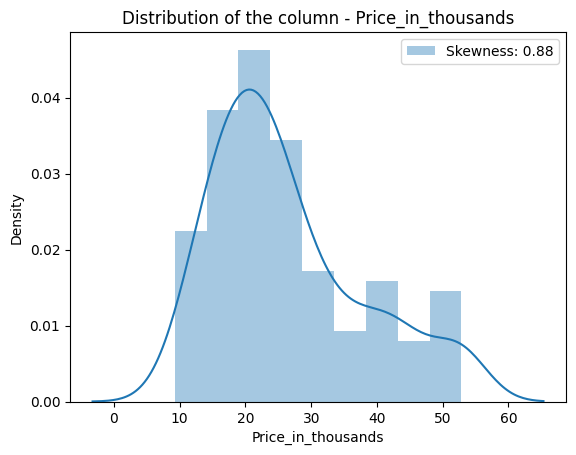

In [69]:
### Understanding the distribution of the column  Price_in_thousands

sns.distplot(modified_dataset['Price_in_thousands'], label = 'Skewness: %.2f'%(modified_dataset['Price_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price_in_thousands')

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\515658259.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Price_in_thousands'],


Text(0.5, 1.0, 'Distribution After transform  - Price_in_thousands')

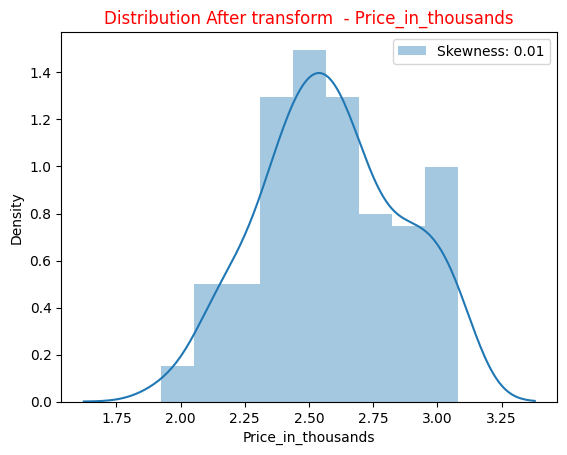

In [70]:
### The distribution of the data approximately normal distribution 

sales_data = [1 if value == 0 else value for value in modified_dataset['Price_in_thousands']]

modified_sales, _ = stats.boxcox(sales_data)
modified_dataset['Price_in_thousands'] = modified_sales

sns.distplot(modified_dataset['Price_in_thousands'], 
             label = 'Skewness: %.2f'%(modified_dataset['Price_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution After transform  - Price_in_thousands',color='r')

# 4.4.3 Transforming from skew to approximately normal distribution (Four_year_resale_value) 

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\2294520590.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['four_year_resale_value'], label = 'Skewness: %.2f'%(modified_dataset['four_year_resale_value'].skew()))


Text(0.5, 1.0, 'Distribution of the column - four_year_resale_value')

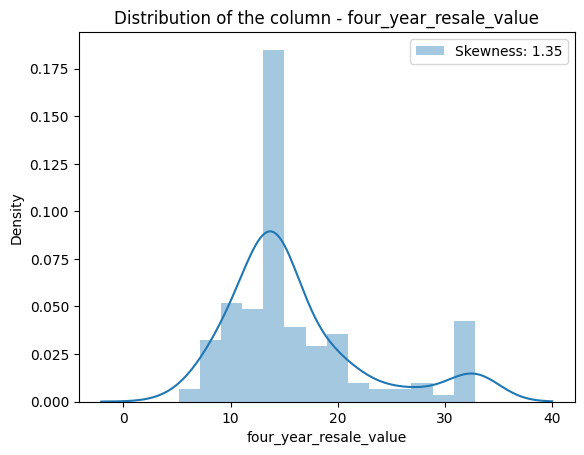

In [71]:
### Understanding the distribution of the column - __year_resale_value

sns.distplot(modified_dataset['four_year_resale_value'], label = 'Skewness: %.2f'%(modified_dataset['four_year_resale_value'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - four_year_resale_value')

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\2229275891.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['four_year_resale_value'], label = 'Skewness: %.2f'%(modified_dataset['four_year_resale_value'].skew()))


Text(0.5, 1.0, 'Distribution After transform  - four_year_resale_value')

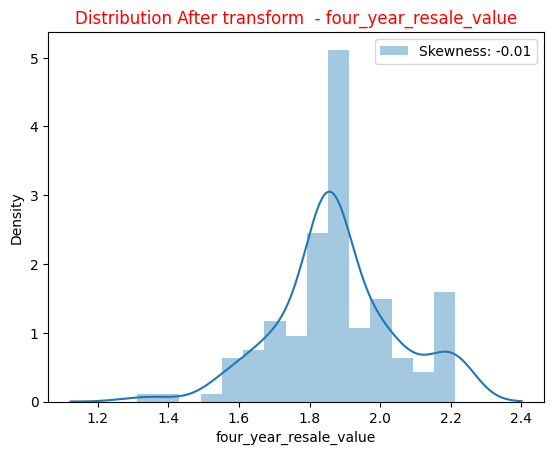

In [72]:
### Understanding the distribution of the data approximately normal distribution four_year_resale_value)

year_data = [1 if value == 0 else value for value in modified_dataset['four_year_resale_value']]

modified_year, _ = stats.boxcox(year_data)
modified_dataset['four_year_resale_value'] = modified_year

sns.distplot(modified_dataset['four_year_resale_value'], label = 'Skewness: %.2f'%(modified_dataset['four_year_resale_value'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution After transform  - four_year_resale_value',color='r')

# 4.4.4 Transforming from skew to approximately normal distribution -Engine_size

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\4250028968.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Engine_size'], label = 'Skewness: %.2f'%(modified_dataset['Engine_size'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Engine_size')

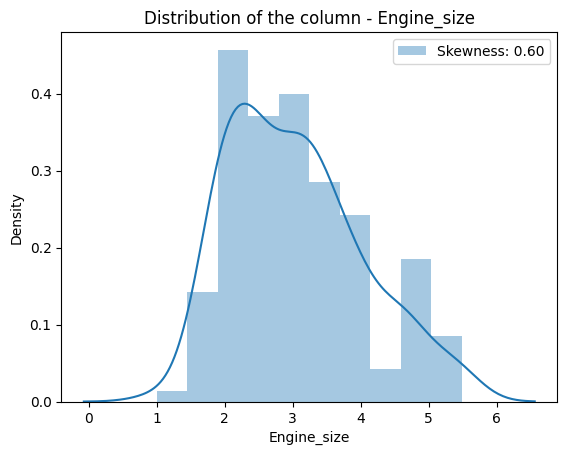

In [73]:
### Understanding the distribution of the column - Engine_size

sns.distplot(modified_dataset['Engine_size'], label = 'Skewness: %.2f'%(modified_dataset['Engine_size'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Engine_size')

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\17985909.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Engine_size'], label = 'Skewness: %.2f'%(modified_dataset['Engine_size'].skew()))


Text(0.5, 1.0, 'Distribution After transform  - Engine_size')

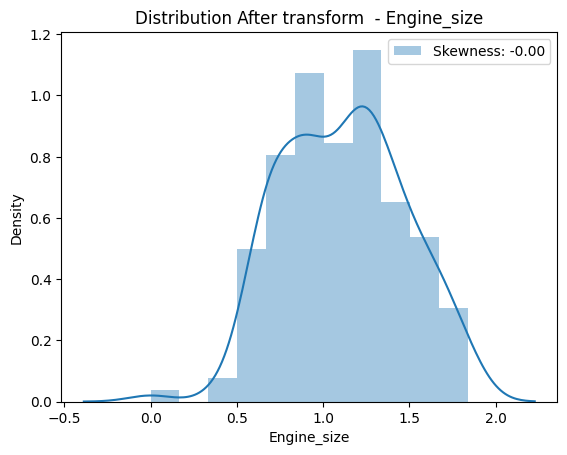

In [74]:
### Understanding the distribution of the data approximately normal distribution Engine_size)

engine_data = [1 if value == 0 else value for value in modified_dataset['Engine_size']]

modified_engine, _ = stats.boxcox(engine_data)
modified_dataset['Engine_size'] = modified_engine

sns.distplot(modified_dataset['Engine_size'], label = 'Skewness: %.2f'%(modified_dataset['Engine_size'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution After transform  - Engine_size')

# 4.4.5 Transforming from skew to approximately normal distribution - Horsepower

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\1131331642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Horsepower'], label = 'Skewness: %.2f'%(modified_dataset['Horsepower'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Horsepower')

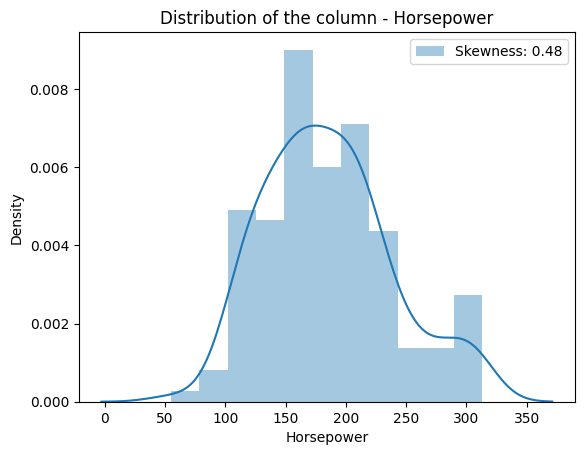

In [75]:
### Understanding the distribution of the column - Horsepower

sns.distplot(modified_dataset['Horsepower'], label = 'Skewness: %.2f'%(modified_dataset['Horsepower'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Horsepower')

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\4092414805.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Horsepower'], label = 'Skewness: %.2f'%(modified_dataset['Horsepower'].skew()))


Text(0.5, 1.0, 'Distribution After transform  - Horsepower')

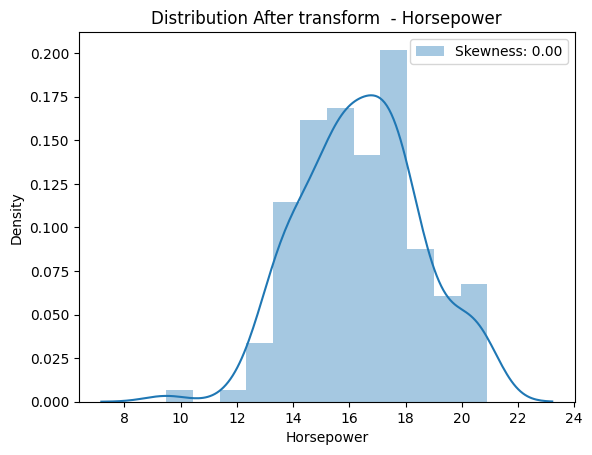

In [76]:
### Understanding the distribution of the data approximately normal distribution Horsepower)

horsepower_data = [1 if value == 0 else value for value in modified_dataset['Horsepower']]

modified_horsepower, _ = stats.boxcox(horsepower_data)
modified_dataset['Horsepower'] = modified_horsepower

sns.distplot(modified_dataset['Horsepower'], label = 'Skewness: %.2f'%(modified_dataset['Horsepower'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution After transform  - Horsepower')

# 4.4.6 Transforming from skew to approximately normal distribution- Fuel_capacity

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\1166007360.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_capacity'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Fuel_capacity')

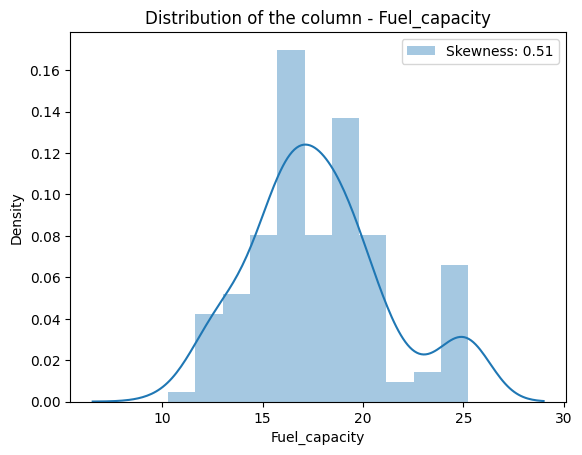

In [77]:
### Understanding the distribution of the column - Fuel_capacity

sns.distplot(modified_dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_capacity'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_capacity')

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\774156659.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_capacity'].skew()))


Text(0.5, 1.0, 'Distribution After transform  - Fuel_capacity')

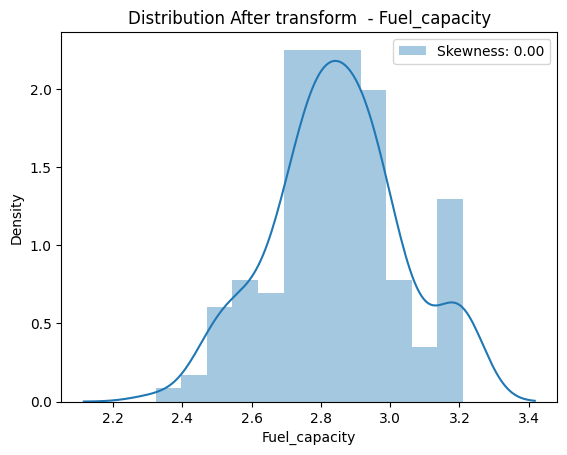

In [78]:
### Understanding the distribution of the data approximately normal distribution Fuel_capacity)

fuel_data = [1 if value == 0 else value for value in modified_dataset['Fuel_capacity']]

modified_fuel, _ = stats.boxcox(fuel_data)
modified_dataset['Fuel_capacity'] = modified_fuel

sns.distplot(modified_dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_capacity'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution After transform  - Fuel_capacity')

# 4.4.7 Transforming from skew to approximately normal distribution - Power_perf_factor 

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\2987590551.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(modified_dataset['Power_perf_factor'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Power_perf_factor')

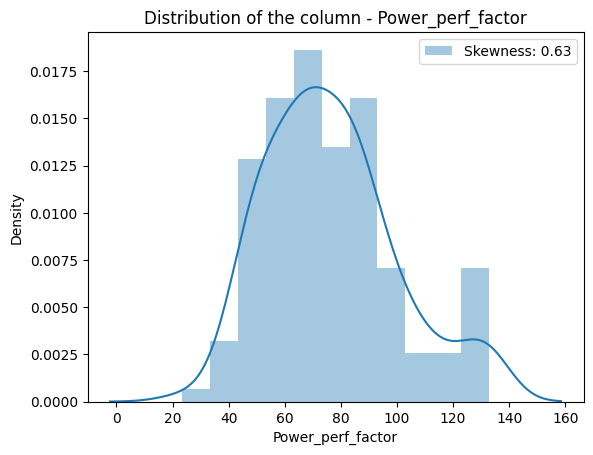

In [79]:
### Understanding the distribution of the column - Power_perf_factor

sns.distplot(modified_dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(modified_dataset['Power_perf_factor'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Power_perf_factor')

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\3570558295.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(modified_dataset['Power_perf_factor'].skew()))


Text(0.5, 1.0, 'Distribution After transform - Power_perf_factor')

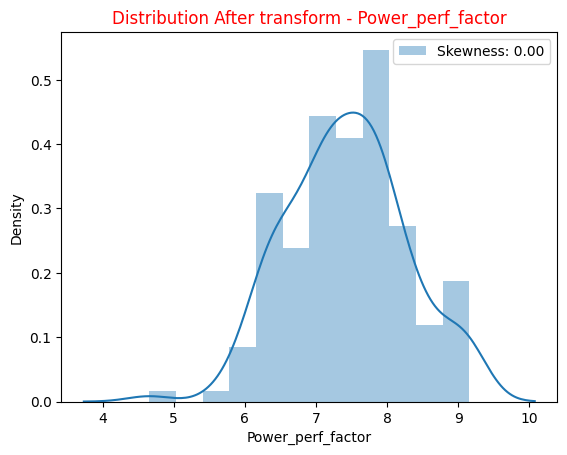

In [80]:
### Understanding the distribution of the data approximately normal distribution Power_perf_factor)

power_data = [1 if value == 0 else value for value in modified_dataset['Power_perf_factor']]

modified_power, _ = stats.boxcox(power_data)
modified_dataset['Power_perf_factor'] = modified_power

sns.distplot(modified_dataset['Power_perf_factor'], label = 'Skewness: %.2f'%(modified_dataset['Power_perf_factor'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution After transform - Power_perf_factor',color='r')

# 4.4.8 Transforming from skew to approximately normal distribution - Fuel_efficiency

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\2564914800.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Fuel_efficiency'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_efficiency'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Fuel_efficiency')

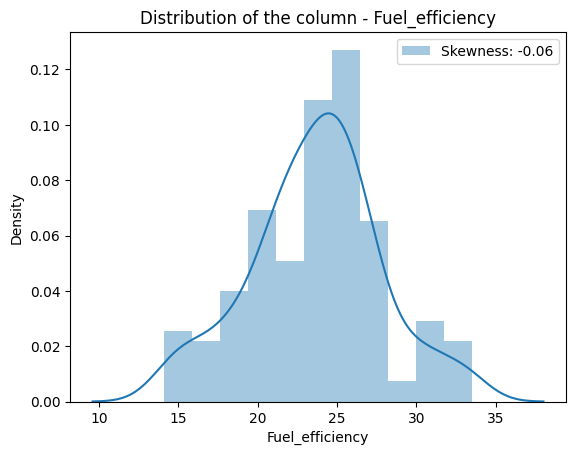

In [81]:
### Understanding the distribution of the column - Fuel_efficiency

sns.distplot(modified_dataset['Fuel_efficiency'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_efficiency'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_efficiency')

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\1185437201.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_dataset['Fuel_efficiency'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_efficiency'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Fuel_efficiency')

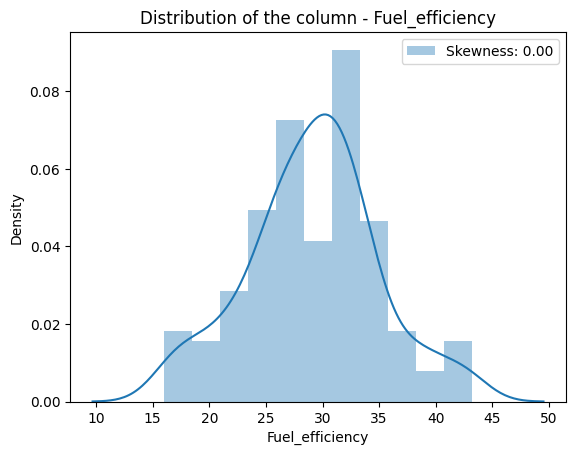

In [82]:
### Understanding the distribution of the data Box_Cox Fuel_efficiency

power_data = [1 if value == 0 else value for value in modified_dataset['Fuel_efficiency']]

modified_power, _ = stats.boxcox(power_data)
modified_dataset['Fuel_efficiency'] = modified_power

sns.distplot(modified_dataset['Fuel_efficiency'], label = 'Skewness: %.2f'%(modified_dataset['Fuel_efficiency'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Fuel_efficiency')

# 4.5 Feature Encoding

## 4.5.1. Create New Feature

In [83]:
### One Hot Encoding the columns
 
from sklearn.preprocessing import LabelEncoder
# For 'Vehicle_type' feature
label_encoder_vehicle_type = LabelEncoder()
modified_dataset['Vehicle_type_encoded'] = label_encoder_vehicle_type.fit_transform(modified_dataset['Vehicle_type'])


## 4.5.2 Dropping unnecessary columns

In [84]:
# Drop the original categorical columns

data2 = modified_dataset.drop(['Vehicle_type'], axis=1)


In [85]:
#data2 = modified_dataset.drop(['Width'], axis=1)
#data2 = modified_dataset.drop(['Vehicle_type'], axis=1)
#data2 = modified_dataset.drop(['Vehicle_type'], axis=1)
#data2 = modified_dataset.drop(['Vehicle_type'], axis=1)

In [86]:
data2.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Vehicle_type_encoded
0,1,1,4.197853,1.927950,2.516786,0.603584,14.678608,101.2,67.3,172.4,2.639,2.568489,35.251747,6.798276,11,1
1,1,1,6.188474,2.013447,2.698089,1.226102,18.116939,108.1,70.3,192.9,3.517,2.830656,30.987867,8.028449,12,1
2,1,1,3.825422,1.975958,2.555561,1.226102,18.116939,106.9,70.6,192.0,3.470,2.830656,32.403370,7.361664,11,1
3,1,1,2.891200,2.175944,2.941819,1.325988,17.577403,114.6,71.4,196.6,3.850,2.875660,26.778659,8.029049,12,1
4,1,1,4.601012,2.061001,2.588973,0.603584,15.140695,102.6,68.2,178.0,2.998,2.783500,33.824728,6.992803,12,1
5,1,1,4.420449,2.084300,2.810859,1.078747,17.204353,108.7,76.1,192.0,3.561,2.902779,26.778659,7.807343,12,1
6,1,1,0.336117,2.213093,3.079041,1.531711,20.818314,113.0,74.0,198.2,3.902,3.147835,25.388837,9.157914,11,1
7,1,1,4.529744,1.859212,2.665421,0.955065,16.010731,107.3,68.4,176.0,3.179,2.795502,32.403370,7.329740,12,1
8,1,1,3.019511,2.162171,2.800652,1.078747,16.936308,107.3,68.5,176.0,3.197,2.795502,29.578428,7.716250,11,1
9,1,1,4.272479,2.213093,2.895057,1.078747,16.936308,111.4,70.9,188.0,3.472,2.902779,30.987867,7.788336,12,1


# 4.6 Feature Scaling

## 4.6.1 Normalizing the numerical columns

In [87]:
### A function to normalize numerical columns

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['Manufacturer','Model','Sales_in_thousands','Price_in_thousands', 'four_year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
                    'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Age','Vehicle_type_encoded']
for each_column in numerical_columns:
    normalize_columns(data2, each_column)

In [88]:
data2.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Vehicle_type_encoded
0,0.0,0.0,0.487265,0.683843,0.513581,0.328110,0.454491,0.257485,0.271676,0.306258,0.236397,0.277126,0.707889,0.475843,0.00,1.0
1,0.0,0.0,0.652438,0.778639,0.670430,0.666512,0.755398,0.464072,0.445087,0.579228,0.515371,0.572551,0.551067,0.749107,0.25,1.0
2,0.0,0.0,0.456362,0.737072,0.547126,0.666512,0.755398,0.428144,0.462428,0.567244,0.500437,0.572551,0.603128,0.600990,0.00,1.0
3,0.0,0.0,0.378844,0.958810,0.881286,0.720810,0.708180,0.658683,0.508671,0.628495,0.621177,0.623264,0.396255,0.749240,0.25,1.0
4,0.0,0.0,0.520717,0.831365,0.576031,0.328110,0.494931,0.299401,0.323699,0.380826,0.350465,0.519414,0.655404,0.519054,0.25,1.0
5,0.0,0.0,0.505735,0.857198,0.767990,0.586409,0.675532,0.482036,0.780347,0.567244,0.529351,0.653823,0.396255,0.699991,0.25,1.0
6,0.0,0.0,0.166835,1.000000,1.000000,0.832642,0.991809,0.610778,0.658960,0.649800,0.637700,0.929966,0.345138,1.000000,0.00,1.0
7,0.0,0.0,0.514804,0.607628,0.642168,0.519175,0.571072,0.440120,0.335260,0.354194,0.407975,0.532938,0.603128,0.593899,0.25,1.0
8,0.0,0.0,0.389491,0.943539,0.759159,0.586409,0.652074,0.440120,0.341040,0.354194,0.413694,0.532938,0.499228,0.679756,0.00,1.0
9,0.0,0.0,0.493457,1.000000,0.840831,0.586409,0.652074,0.562874,0.479769,0.513981,0.501072,0.653823,0.551067,0.695769,0.25,1.0


# 4.7 Feature Selection

In [89]:
#Check Datatypes (all features are numerical)
data2.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Vehicle_type_encoded
0,0.0,0.0,0.487265,0.683843,0.513581,0.328110,0.454491,0.257485,0.271676,0.306258,0.236397,0.277126,0.707889,0.475843,0.00,1.0
1,0.0,0.0,0.652438,0.778639,0.670430,0.666512,0.755398,0.464072,0.445087,0.579228,0.515371,0.572551,0.551067,0.749107,0.25,1.0
2,0.0,0.0,0.456362,0.737072,0.547126,0.666512,0.755398,0.428144,0.462428,0.567244,0.500437,0.572551,0.603128,0.600990,0.00,1.0
3,0.0,0.0,0.378844,0.958810,0.881286,0.720810,0.708180,0.658683,0.508671,0.628495,0.621177,0.623264,0.396255,0.749240,0.25,1.0
4,0.0,0.0,0.520717,0.831365,0.576031,0.328110,0.494931,0.299401,0.323699,0.380826,0.350465,0.519414,0.655404,0.519054,0.25,1.0


In [90]:
cr =data2.corr()

cr['Sales_in_thousands']

Manufacturer              0.592498
Model                     0.792973
Sales_in_thousands        1.000000
four_year_resale_value   -0.371114
Price_in_thousands       -0.496346
Engine_size              -0.086077
Horsepower               -0.347954
Wheelbase                 0.244598
Width                     0.044971
Length                    0.200887
Curb_weight              -0.057904
Fuel_capacity            -0.028983
Fuel_efficiency           0.102788
Power_perf_factor        -0.378732
Age                      -0.042627
Vehicle_type_encoded     -0.261340
Name: Sales_in_thousands, dtype: float64

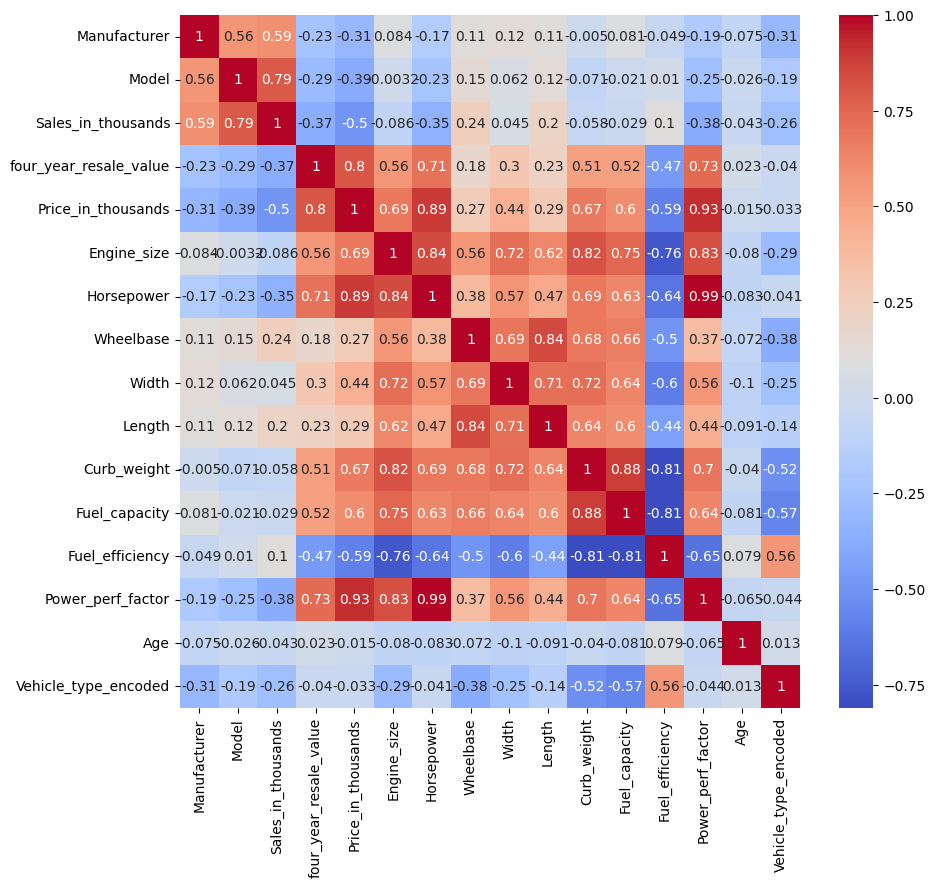

In [91]:
### Plotting the correlation between various columns of the filter_dataset
import matplotlib.pyplot as plt
cr['Sales_in_thousands']

plt.figure(figsize=(10,9))
sns.heatmap(cr,annot=True,cmap="coolwarm");

In [92]:
# Drop feature that unimportant 

data2 = data2.drop(['Width'], axis=1)
data2 = data2.drop(['Fuel_capacity'], axis=1)

data2 = data2.drop(['Age'], axis=1)
data2 = data2.drop(['Horsepower'], axis=1)

# 5. Modelling

# 5.1 Splitting the data to Training and Test sets

In [93]:
import sklearn

from sklearn.model_selection import train_test_split

In [94]:
data_X = data2.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]]

data_y = data2[:]['Sales_in_thousands']


data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            156 non-null    float64
 1   Model                   156 non-null    float64
 2   four_year_resale_value  156 non-null    float64
 3   Price_in_thousands      156 non-null    float64
 4   Engine_size             156 non-null    float64
 5   Wheelbase               156 non-null    float64
 6   Length                  156 non-null    float64
 7   Curb_weight             156 non-null    float64
 8   Fuel_efficiency         156 non-null    float64
 9   Power_perf_factor       156 non-null    float64
 10  Vehicle_type_encoded    156 non-null    float64
dtypes: float64(11)
memory usage: 13.5 KB


In [95]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=90)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 10 to 91
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            109 non-null    float64
 1   Model                   109 non-null    float64
 2   four_year_resale_value  109 non-null    float64
 3   Price_in_thousands      109 non-null    float64
 4   Engine_size             109 non-null    float64
 5   Wheelbase               109 non-null    float64
 6   Length                  109 non-null    float64
 7   Curb_weight             109 non-null    float64
 8   Fuel_efficiency         109 non-null    float64
 9   Power_perf_factor       109 non-null    float64
 10  Vehicle_type_encoded    109 non-null    float64
dtypes: float64(11)
memory usage: 10.2 KB


In [96]:
type(X_test)

pandas.core.frame.DataFrame

In [97]:
type(X_train)

pandas.core.frame.DataFrame

In [98]:
X_train

,Manufacturer,Model,four_year_resale_value,Price_in_thousands,Engine_size,Wheelbase,Length,Curb_weight,Fuel_efficiency,Power_perf_factor,Vehicle_type_encoded
10,1.0,1.0,0.542730,0.526108,0.647379,0.491018,0.601864,0.468028,0.551067,0.593816,1.0
18,0.0,0.0,0.607628,0.931279,1.000000,0.745509,0.689747,1.000000,0.044361,0.867552,0.0
94,0.0,0.0,1.000000,1.000000,0.941313,0.191617,0.368842,0.708555,0.294282,1.000000,1.0
155,0.0,0.0,0.607628,0.799530,0.607367,0.517964,0.537949,0.541743,0.499228,0.708649,1.0
150,0.0,0.0,0.607628,0.561921,0.359170,0.236527,0.362184,0.350465,0.551067,0.549593,1.0
...,...,...,...,...,...,...,...,...,...,...,...
37,1.0,1.0,0.533969,0.539727,0.564759,0.610778,0.723036,0.506474,0.000000,0.671748,1.0
58,1.0,1.0,0.723098,0.487559,0.388777,0.317365,0.375499,0.420685,0.499228,0.493509,0.0
67,1.0,1.0,0.595592,0.516775,0.802535,0.263473,0.241012,0.412741,0.294282,0.638379,0.0
114,0.0,0.0,0.407621,0.343547,0.388777,0.461078,0.491345,0.332671,0.655404,0.426090,1.0


In [99]:
### Looking at the new test data - Y

y_train

10     0.858360
18     0.464140
94     0.255705
155    0.507534
150    0.487656
         ...   
37     0.847706
58     0.799216
67     0.824089
114    0.311174
91     0.501999
Name: Sales_in_thousands, Length: 109, dtype: float64

C:\Users\vanna\AppData\Local\Temp\ipykernel_12980\3406419840.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2.Sales_in_thousands)


<Axes: xlabel='Sales_in_thousands', ylabel='Density'>

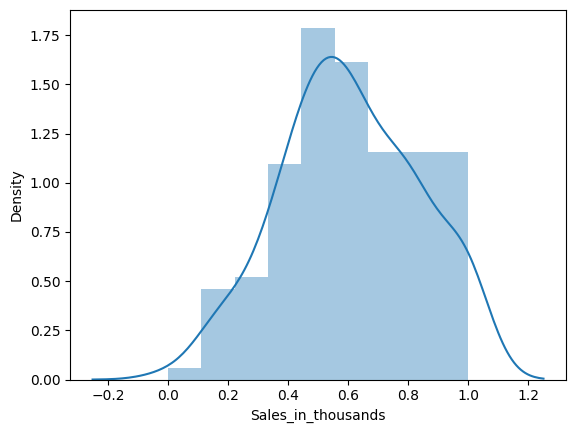

In [100]:
sns.distplot(data2.Sales_in_thousands)

# 5.2 Fit the model

# 5.2.1 Applying Multi Linear Regression

In [101]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

# Train the model using the training sets

lr.fit(X_train,y_train)

LinearRegression()

In [102]:
lr.intercept_

0.3613819008598294

In [103]:
lr.coef_

array([ 0.09669355,  0.27377752, -0.0117693 , -0.33685894, -0.37520799,
        0.10677734,  0.16839156,  0.40424147,  0.24555124,  0.23544167,
       -0.05598971])

In [104]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     31.29
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           3.95e-27
Time:                        09:34:06   Log-Likelihood:                 84.532
No. Observations:                 109   AIC:                            -145.1
Df Residuals:                      97   BIC:                            -112.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# 6. Conclusion

Hence, for this problem, we will use Multiple regressor to predict the Sales Price of the Car.